# Attestation
All group members contributed meaningfully to the project, and have complete knowledge of any part of it 

The group members contributed to the following: 

Stephanie: 
- Ask 1 
- Ask 2 Data Wrangling (Dimensional Model, Adding attributes)
- Ask 3 Data Analysis (Q3 Part 2 total transactions per quarter to conclusion of Q3 part 2)
- Slide deck creation (ask 1, ask 3 question 3 slides, editing)
- Group lead misc tasks (scheduling meetings, proofreading, assisting other group members)

Priscilla: 
- Ask 2 Data Wrangling (Dimensional Model)
- Ask 3 Data Analysis (Q3 part 1)
- Slide deck creation (tidying up/edits, ask 1, ask 3 (Q3, Part 1)
- Assisting other group members

Xinyi: 
- Ask 2 Data Wrangling 
- Ask 3 Data Analysis (Question 2)
- Slide deck creation (ask 2) 
- Assisting other group members

Swapnil: 
- Ask 3 Data Wrangling (Question 2)
- Editing slide deck
- Assisting other group members

Mounika: 
- Ask 1
-Ask 3 Data Analysis (Q3 part 2 (Observing Customer Loyalty and Observing Popular Product Sales))
- Slide deck 

# Ask 1 - Identifying the Data Set

##### Identify and describe your dataset 
This data set contains sales transactions from UK-based online retailers over the course of a year. Since 2007, this London-based store has sold presents and household goods for both adults and children online. Small enterprises can also buy in bulk and sell to additional clients via retail outlet channels. They have clients from all over the world who often make purchases for themselves directly.

##### Identify data source 
https://www.kaggle.com/datasets/gabrielramos87/an-online-shop-business

##### Why is important and what appeals to you about it 
It is crucial and appealing because e-commerce has emerged as a new avenue for promoting business growth. Businesses can get access to and develop a larger market presence through e-commerce by offering less expensive and more effective distribution channels for their goods or services. The way individuals shop and use goods and services has also altered as a result of e-commerce. To simply get their purchases delivered to their homes, many consumers are using their computers or other smart devices to place orders.

##### Is this data suitable for dimensional modeling and analytical analysis 
This dataset has a clear mixture of numerical fields and categorical attributes, which we can be clarified through providing codes. 
Furthermore, some attributes, such as Country, will allow us to perform a deeper analysis and form interesting questions about the dataset. Additionally, some attributes can be divided up further, such as day of the week, in order to aid in deeper analysis later. 

##### Describe the analytical questions you want to answer with the data. Minimum of 3 major questions are required
1) What products have been purchased and returned the most?

2) What orders (that were later canceled) have the highest quantity?

3) How can the company maximize profits? 

1.   How can the company decrease costs? 
2.   How can the company increase sales?

##### Describe any concerns with the data and changes you expect to overcome

- Dataset includes both cancellations and purchases, which can get confusing when looking at the data
- No data dictionary included
- Lack of dding columns such as transaction quarter and continent in order to add a layer to our data analysis 
- Data is very skewed and has a significantly larger amount of data regarding the European market, though they do ship to a number of regions outside of Europe. 
- Small number of information regarding consumers, which makes it difficult to provided detailed consumer insights on purchasing habits. 
- Overlapping records: one customer may have purchased several products in one transaction, while a specific product may have been purchased by many different consumers. 

# Ask 2: Data Wrangling and Dimensional Modeling

In [ ]:
!wget https://finalgroup15.s3.amazonaws.com/archive.zip

--2022-12-07 07:55:28--  https://finalgroup15.s3.amazonaws.com/archive.zip
Resolving finalgroup15.s3.amazonaws.com (finalgroup15.s3.amazonaws.com)... 52.217.167.33, 52.217.192.97, 52.217.230.57, ...
Connecting to finalgroup15.s3.amazonaws.com (finalgroup15.s3.amazonaws.com)|52.217.167.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6981189 (6.7M) [application/zip]
Saving to: ‘archive.zip’

archive.zip         100%[===================>]   6.66M  --.-KB/s    in 0.1s    

2022-12-07 07:55:28 (69.3 MB/s) - ‘archive.zip’ saved [6981189/6981189]



In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: Sales Transaction v.4a.csv  


In [ ]:
!wc -l "Sales Transaction v.4a.csv"

536351 Sales Transaction v.4a.csv


In [ ]:
!csvcut -n "Sales Transaction v.4a.csv"

  1: TransactionNo
  2: Date
  3: ProductNo
  4: ProductName
  5: Price
  6: Quantity
  7: CustomerNo
  8: Country


There are 8 columns in the original dataset.

In [ ]:
!xsv select 1,2,3,4,5,6,7,8 "Sales Transaction v.4a.csv" | xsv stats | xsv table

field          type     sum                min                     max                               min_length  max_length  mean                stddev
TransactionNo  Unicode                     536365                  C581569                           6           7                               
Date           Unicode                     1/10/2019               9/9/2019                          8           10                              
ProductNo      Unicode                     10002                   90214Z                            5           6                               
ProductName    Unicode                     10 Colour Spaceboy Pen  Zinc Wire Sweetheart Letter Tray  8           35                              
Price          Float    6791361.470005952  5.13                    660.62                            4           6           12.662182287685704  8.49044228578554
Quantity       Integer  5320242            -80995                  80995                             1

In [ ]:
!pwd

/home/ubuntu/notebooks


From the results, we see that the data length for all results in each attribute is not the same. There could an explanation for this: <br>
**************************************************************************************************************************<br>
__TransactionNo__: The data length could be 6 or 7, and the distinguishment occurs when the letter "C" is added in front of the 6-digit unique number. The letter "C"indicates a cancellation, and records with "C" are the orders that were cancelled or returned.<br>
__Date__: The data length of date shoule be regular and fixed, but the result of  records occurring in October, Novmeber, December and at the 10th-31st days in each month might have more data length than the basic 8 numberic result.<br>
__ProductNo__: The data length of the results is a five or six-digit unique character, and we can combine ProductNo and ProductName to define a specific product. <br>
__CustomerNo__: Each customer owns a unique 5-digit result, except for the undefined customer, whose numbers in the rersult would be "NA".

We can use csvstat to check the occurences in the values of this attribute. Due to the size of the dataset, we choose the first 10% data(that will be 536351*10%=53635)

In [ ]:
!head -n 53635 "Sales Transaction v.4a.csv"  | csvstat

  1. "TransactionNo"

	Type of data:          Text
	Contains null values:  False
	Unique values:         1969
	Longest value:         7 characters
	Most common values:    581219 (747x)
	                       581492 (730x)
	                       580729 (720x)
	                       579777 (685x)
	                       581217 (674x)

  2. "Date"

	Type of data:          Date
	Contains null values:  False
	Unique values:         17
	Smallest value:        2019-11-21
	Largest value:         2019-12-09
	Most common values:    2019-12-05 (5299x)
	                       2019-12-08 (4923x)
	                       2019-11-29 (4290x)
	                       2019-11-22 (3921x)
	                       2019-11-24 (3730x)

  3. "ProductNo"

	Type of data:          Text
	Contains null values:  False
	Unique values:         2710
	Longest value:         6 characters
	Most common values:    23084 (306x)
	                       22086 (255x)
	                       23355 (193x)
	                      

The result tells us that the values in each attribute are not all unqiue in the sample of the first 10% records. It can be inferred that there are a lot of overlaping in the records. One unqiue customer might purchase diverse products in one transcation, and a specific product might be bought by differing customers in varied transcation.

In [ ]:
!grep -c 'NA' "Sales Transaction v.4a.csv"

55


As the introduction of the dataset from Kaggle, there is **NO** missing value in the dataset. But, there is some where unmatched parts, which occur in the dimension customer and represents that a small part of cumstomer_no was recorded as NA(55/536350), meaning no specific information in the customer number. But we could still seek for sure the customer from other information in the same record. Therefore, we believe this small size of unmatched information will not influence the wrangling and analysis part in our project, and we do not need to do extra commend for them.

There is no missing value in the records, so we can start to build database.

In [2]:
%load_ext sql

First, we used PostgreSQL's `dropdb` command to drop the database named e-commerce8 to avoid the condition that there is another session using the database. It is normal to get the error saying "database Project does not exist".

In [ ]:
!dropdb -U student e-commerce8

dropdb: error: database removal failed: ERROR:  database "e-commerce8" is being accessed by other users
DETAIL:  There is 1 other session using the database.


Then, we can use `createdb` command to creat the database named "e-commerce8" after we are sure that the database is not being occupied.

In [ ]:
!createdb -U student e-commerce8

createdb: error: database creation failed: ERROR:  database "e-commerce8" already exists


Next, we can connect the database "e-commerce2"

In [3]:
%sql postgresql://student@/e-commerce8

Then, we `create table` E_COMMERCE, including the characteristics of each attribute. All the attributes are NOT NULL, showing that there is not missing value in the attributes.

In [ ]:
%%sql
DROP TABLE IF EXISTS E_COMMERCE CASCADE; 

CREATE TABLE E_COMMERCE( 

TRANSACTION_NO VARCHAR(10) NOT NULL, 
DATE DATE NOT NULL,
PRODUCT_NO VARCHAR(6) NOT NULL, 
PRODUCT_NAME VARCHAR(200) NOT NULL,
PRICE FLOAT(10) NOT NULL, 
QUANTITY INT NOT NULL, 
CUSTOMER_NO VARCHAR(6) NOT NULL, 
COUNTRY VARCHAR(20) NOT NULL

); 

 * postgresql://student@/e-commerce8
Done.
Done.


[]

Notice: following the conditions we have observed, we can not use INT as the type of attributes of "PRODUCT_NO","TRANSACTION_NO","CUSTOMER_NO"

In [ ]:
!psql --version

psql (PostgreSQL) 12.12 (Ubuntu 12.12-0ubuntu0.20.04.1)


Now, we will load the data directly using the `COPY` command.

In [ ]:
!pwd

/home/ubuntu/notebooks


In [ ]:
%%sql 
COPY E_COMMERCE FROM '/home/ubuntu/notebooks/Sales Transaction v.4a.csv'
CSV
HEADER;

 * postgresql://student@/e-commerce8
536350 rows affected.


[]

In [ ]:
%%sql
SELECT COUNT(*) FROM E_COMMERCE;

 * postgresql://student@/e-commerce8
1 rows affected.


count
536350


In [ ]:
%%sql
SELECT * FROM E_COMMERCE
LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


transaction_no,date,product_no,product_name,price,quantity,customer_no,country
581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom
581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom
581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom
581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom
581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom
581475,2019-12-09,21705,Bag 500g Swirly Marbles,10.65,24,13069,United Kingdom
581475,2019-12-09,22118,Joy Wooden Block Letters,11.53,18,13069,United Kingdom
581475,2019-12-09,22119,Peace Wooden Block Letters,12.25,12,13069,United Kingdom
581475,2019-12-09,22217,T-Light Holder Hanging Lace,10.65,12,13069,United Kingdom
581475,2019-12-09,22216,T-Light Holder White Lace,10.55,24,13069,United Kingdom


In the following step, we will show the schema and represent how we work on the dimension table.

In [ ]:
from IPython.display import Image
Image(url="https://github.com/xinyili2022/dmfafinalproject/blob/main/schema1207.png?raw=true")  

### Add more attributes

We decided to add more attributes in order to derive business insights specific to regions later in the analysis portion of our deliverable. Since there are many different countries represented in the dataset, we believed it would be easier for us to gather information on customers by grouping them in regions/markets.

add the column of "continent"

In [ ]:
%%sql
ALTER TABLE E_COMMERCE
ADD COLUMN CONTINENT VARCHAR(20);

 * postgresql://student@/e-commerce8
Done.


[]

In [ ]:
%%sql
SELECT * FROM E_COMMERCE
LIMIT 10

 * postgresql://student@/e-commerce8
10 rows affected.


transaction_no,date,product_no,product_name,price,quantity,customer_no,country,continent
581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom,None
581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom,None
581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom,None
581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom,None
581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom,None
581475,2019-12-09,21705,Bag 500g Swirly Marbles,10.65,24,13069,United Kingdom,None
581475,2019-12-09,22118,Joy Wooden Block Letters,11.53,18,13069,United Kingdom,None
581475,2019-12-09,22119,Peace Wooden Block Letters,12.25,12,13069,United Kingdom,None
581475,2019-12-09,22217,T-Light Holder Hanging Lace,10.65,12,13069,United Kingdom,None
581475,2019-12-09,22216,T-Light Holder White Lace,10.55,24,13069,United Kingdom,None


In [ ]:
%%sql
UPDATE E_COMMERCE
SET continent = 'Europe'
WHERE  country = 'United Kingdom' OR country = 'Channel Islands' OR country ='Germany' OR country = 'Sweden' OR country='France' OR country='EIRE' OR country='Belgium' OR country='Spain' OR country='Switzerland' OR country='Netherlands' OR country='Portugal' OR country='Norway' OR country='Austria' OR country='Iceland' OR country='Finland' OR country='Italy' OR country='Cyprus' OR country='Sweeden' OR country='Denmark' OR country='Czech Republic' OR country = 'European Community' OR country = 'Greece' OR country = 'Lithuania' OR country = 'Poland' OR country = 'Malta';

 * postgresql://student@/e-commerce8
532346 rows affected.


[]

In [ ]:
%%sql
UPDATE E_COMMERCE
SET continent = 'Asia' 
WHERE country = 'Hong Kong' OR country = 'Singapore' OR country = 'United Arab Emirates' OR country = 'Japan' OR country = 'Bahrain' OR country = 'Saudi Arabia' OR country = 'Lebanon' OR country = 'Israel'

 * postgresql://student@/e-commerce8
1236 rows affected.


[]

In [ ]:
%%sql 
UPDATE E_COMMERCE
SET continent = 'North America'
WHERE country = 'USA' OR country = 'Canada' 

 * postgresql://student@/e-commerce8
529 rows affected.


[]

In [ ]:
%%sql 
UPDATE E_COMMERCE
SET continent = 'Africa' 
WHERE country = 'RSA' 

 * postgresql://student@/e-commerce8
57 rows affected.


[]

In [ ]:
%%sql 
UPDATE E_COMMERCE
SET continent = 'Oceania' 
WHERE country = 'Australia'

 * postgresql://student@/e-commerce8
1704 rows affected.


[]

In [ ]:
%%sql 
UPDATE E_COMMERCE
SET continent = 'South America'
WHERE country = 'Brazil'

 * postgresql://student@/e-commerce8
31 rows affected.


[]

In [ ]:
%%sql
UPDATE E_COMMERCE
SET continent = 'Unknown' 
WHERE country = 'Unspecified' 

 * postgresql://student@/e-commerce8
447 rows affected.


[]

In [ ]:
%%sql
SELECT COUNT(continent)
FROM E_COMMERCE

 * postgresql://student@/e-commerce8
1 rows affected.


count
536350


### Add more derived facts and dimensions

Create the Product table as a dimension table

In [ ]:
%%sql 
DROP TABLE IF EXISTS product; 

CREATE TABLE product (
    KEY SERIAL PRIMARY KEY,
    PRODUCT_NO varchar(200) NOT NULL,
    PRODUCT_NAME varchar(500) NOT NULL
);

 * postgresql://student@/e-commerce8
Done.
Done.


[]

Populate the product table with data from table 

In [ ]:
%%sql
INSERT INTO product (PRODUCT_NO, PRODUCT_NAME)
SELECT DISTINCT PRODUCT_NO, PRODUCT_NAME
FROM E_COMMERCE;

 * postgresql://student@/e-commerce8
3768 rows affected.


[]

In [ ]:
%%sql
select * from product
limit 5;

 * postgresql://student@/e-commerce8
5 rows affected.


key,product_no,product_name
1,10002,Inflatable Political Globe
2,10080,Groovy Cactus Inflatable
3,10120,Doggy Rubber
4,10123C,Hearts Wrapping Tape
5,10124A,Spots On Red Bookcover Tape


Next, we will add FK product_key to the E_COMMERCE table:

In [ ]:
%%sql
ALTER TABLE E_COMMERCE
ADD COLUMN product_key INTEGER,
ADD CONSTRAINT fk_product
 FOREIGN KEY (product_key)
 REFERENCES product (key); 

 * postgresql://student@/e-commerce8
Done.


[]

To populate the product_key

In [ ]:
%%sql
select * from E_COMMERCE
limit 5;

 * postgresql://student@/e-commerce8
5 rows affected.


transaction_no,date,product_no,product_name,price,quantity,customer_no,country,continent,product_key
C581229,2019-12-08,84828,Jungle Popsicles Ice Lolly Moulds,6.19,-24,12558,USA,North America,None
C581229,2019-12-08,79191C,Retro Plastic Elephant Tray,6.19,-24,12558,USA,North America,None
C581229,2019-12-08,23392,Spaceboy Rocket Lolly Makers,6.19,-24,12558,USA,North America,None
C581229,2019-12-08,23158,Set Of 5 Lucky Cat Magnets,6.19,-36,12558,USA,North America,None
C581229,2019-12-08,22712,Card Dolly Girl,6.19,-12,12558,USA,North America,None


The results above suggests that the product_key attribute has not been added yet, so the results of "product_key" are equal to zero. To rectify this, we will get the connection of the product dimension and measurement. 

In [ ]:
%%sql
UPDATE E_COMMERCE
SET product_key = product.key
FROM product
WHERE E_COMMERCE.product_no = product.product_no;

 * postgresql://student@/e-commerce8
536350 rows affected.


[]

In [ ]:
%%sql
select * from E_COMMERCE 
limit 5;

 * postgresql://student@/e-commerce8
5 rows affected.


transaction_no,date,product_no,product_name,price,quantity,customer_no,country,continent,product_key
C581229,2019-12-08,84828,Jungle Popsicles Ice Lolly Moulds,6.19,-24,12558,USA,North America,3071
C581229,2019-12-08,79191C,Retro Plastic Elephant Tray,6.19,-24,12558,USA,North America,2796
C581229,2019-12-08,23392,Spaceboy Rocket Lolly Makers,6.19,-24,12558,USA,North America,2213
C581229,2019-12-08,23158,Set Of 5 Lucky Cat Magnets,6.19,-36,12558,USA,North America,2001
C581229,2019-12-08,22712,Card Dolly Girl,6.19,-12,12558,USA,North America,1574


In [ ]:
%%sql
select * from product
limit 5;

 * postgresql://student@/e-commerce8
5 rows affected.


key,product_no,product_name
1,10002,Inflatable Political Globe
2,10080,Groovy Cactus Inflatable
3,10120,Doggy Rubber
4,10123C,Hearts Wrapping Tape
5,10124A,Spots On Red Bookcover Tape


We can find that the results of product_key have changed from None to unique numbers. It is suggested that the connection of product dimension and the facts has been successful.

__Let's continue repeating the processes and finishing the other connections of measurement and other dimensions__

Create the Customer table as a dimension table

In [ ]:
%%sql 
DROP TABLE IF EXISTS customer;

CREATE TABLE customer (
    KEY SERIAL PRIMARY KEY,
    CUSTOMER_NO VARCHAR(6) NOT NULL 
);

 * postgresql://student@/e-commerce8
Done.
Done.


[]

In [ ]:
%%sql
INSERT INTO customer(CUSTOMER_NO)
SELECT DISTINCT CUSTOMER_NO
FROM E_COMMERCE;

 * postgresql://student@/e-commerce8
4739 rows affected.


[]

In [ ]:
%%sql
select * from customer
limit 5;

 * postgresql://student@/e-commerce8
5 rows affected.


key,customer_no
1,16692
2,12377
3,13655
4,15967
5,13165


In [ ]:
%%sql 
SELECT COUNT(*) 
FROM customer;

 * postgresql://student@/e-commerce8
1 rows affected.


count
4739


In [ ]:
%%sql
ALTER TABLE E_COMMERCE
ADD COLUMN customer_key INTEGER,
ADD CONSTRAINT fk_customer
 FOREIGN KEY (customer_key)
 REFERENCES customer (key); 

 * postgresql://student@/e-commerce8
Done.


[]

In [ ]:
%%sql
select * from E_COMMERCE
limit 5;

 * postgresql://student@/e-commerce8
5 rows affected.


transaction_no,date,product_no,product_name,price,quantity,customer_no,country,continent,product_key,customer_key
C581229,2019-12-08,84828,Jungle Popsicles Ice Lolly Moulds,6.19,-24,12558,USA,North America,3071,None
C581229,2019-12-08,79191C,Retro Plastic Elephant Tray,6.19,-24,12558,USA,North America,2796,None
C581229,2019-12-08,23392,Spaceboy Rocket Lolly Makers,6.19,-24,12558,USA,North America,2213,None
C581229,2019-12-08,23158,Set Of 5 Lucky Cat Magnets,6.19,-36,12558,USA,North America,2001,None
C581229,2019-12-08,22712,Card Dolly Girl,6.19,-12,12558,USA,North America,1574,None


Similarly, the results of customer_key above are none, suggesting that we have not built up the connection. Therefore, we will now connect:

In [ ]:
%%sql
UPDATE E_COMMERCE
SET customer_key = customer.key
FROM customer
WHERE E_COMMERCE.customer_no = customer.customer_no;

 * postgresql://student@/e-commerce8
536350 rows affected.


[]

In [ ]:
%%sql
select * from E_COMMERCE
limit 5;

 * postgresql://student@/e-commerce8
5 rows affected.


transaction_no,date,product_no,product_name,price,quantity,customer_no,country,continent,product_key,customer_key
C581229,2019-12-08,23158,Set Of 5 Lucky Cat Magnets,6.19,-36,12558,USA,North America,2001,1037
C581229,2019-12-08,23392,Spaceboy Rocket Lolly Makers,6.19,-24,12558,USA,North America,2213,1037
C581229,2019-12-08,79191C,Retro Plastic Elephant Tray,6.19,-24,12558,USA,North America,2796,1037
C581229,2019-12-08,84828,Jungle Popsicles Ice Lolly Moulds,6.19,-24,12558,USA,North America,3071,1037
C581229,2019-12-08,23209,Lunch Bag Vintage Doily,6.19,-20,12558,USA,North America,2051,1037


In [ ]:
%%sql
select * from customer
limit 5;

 * postgresql://student@/e-commerce8
5 rows affected.


key,customer_no
1,16692
2,12377
3,13655
4,15967
5,13165


In [ ]:
%%sql
SELECT COUNT(*) 
FROM customer;

 * postgresql://student@/e-commerce8
1 rows affected.


count
4739


So, the results of "customer_key" has changed from nove to specific number, showing that the connection was successful.

__Similarly, let's built the connection of the transctions dimension and the measurement.__

In [ ]:
%%sql 
DROP TABLE IF EXISTS transactions;

CREATE TABLE transactions (
    KEY SERIAL PRIMARY KEY,
    TRANSACTION_NO VARCHAR(10) NOT NULL
);

 * postgresql://student@/e-commerce8
Done.
Done.


[]

In [ ]:
%%sql
INSERT INTO transactions (TRANSACTION_NO)
SELECT DISTINCT TRANSACTION_NO
FROM E_COMMERCE;

 * postgresql://student@/e-commerce8
23204 rows affected.


[]

In [ ]:
%%sql
select * from transactions
limit 5;

 * postgresql://student@/e-commerce8
5 rows affected.


key,transaction_no
1,574935
2,563579
3,C539253
4,572671
5,548909


In [ ]:
%%sql
ALTER TABLE E_COMMERCE
ADD COLUMN transactions_key INTEGER,
ADD CONSTRAINT fk_transactions
 FOREIGN KEY (transactions_key)
 REFERENCES transactions (key); 

 * postgresql://student@/e-commerce8
Done.


[]

In [ ]:
%%sql
select * from E_COMMERCE
limit 5;

 * postgresql://student@/e-commerce8
5 rows affected.


transaction_no,date,product_no,product_name,price,quantity,customer_no,country,continent,product_key,customer_key,transactions_key
C581229,2019-12-08,23158,Set Of 5 Lucky Cat Magnets,6.19,-36,12558,USA,North America,2001,1037,None
C581229,2019-12-08,23392,Spaceboy Rocket Lolly Makers,6.19,-24,12558,USA,North America,2213,1037,None
C581229,2019-12-08,79191C,Retro Plastic Elephant Tray,6.19,-24,12558,USA,North America,2796,1037,None
C581229,2019-12-08,84828,Jungle Popsicles Ice Lolly Moulds,6.19,-24,12558,USA,North America,3071,1037,None
C581229,2019-12-08,23209,Lunch Bag Vintage Doily,6.19,-20,12558,USA,North America,2051,1037,None


In [ ]:
%%sql
UPDATE E_COMMERCE
SET transactions_key = transactions.key
FROM transactions
WHERE E_COMMERCE.transaction_no = transactions.transaction_no;

 * postgresql://student@/e-commerce8
536350 rows affected.


[]

In [ ]:
%%sql
SELECT * FROM E_COMMERCE
LIMIT 5;

 * postgresql://student@/e-commerce8
5 rows affected.


transaction_no,date,product_no,product_name,price,quantity,customer_no,country,continent,product_key,customer_key,transactions_key
C581229,2019-12-08,84828,Jungle Popsicles Ice Lolly Moulds,6.19,-24,12558,USA,North America,3071,1037,21347
C581229,2019-12-08,79191C,Retro Plastic Elephant Tray,6.19,-24,12558,USA,North America,2796,1037,21347
C581229,2019-12-08,23392,Spaceboy Rocket Lolly Makers,6.19,-24,12558,USA,North America,2213,1037,21347
C581229,2019-12-08,23158,Set Of 5 Lucky Cat Magnets,6.19,-36,12558,USA,North America,2001,1037,21347
C581229,2019-12-08,22712,Card Dolly Girl,6.19,-12,12558,USA,North America,1574,1037,21347


In [ ]:
%%sql
SELECT * FROM transactions
LIMIT 5;

 * postgresql://student@/e-commerce8
5 rows affected.


key,transaction_no
1,574935
2,563579
3,C539253
4,572671
5,548909


__let's built the connection of the location dimension and the measurement.__

In [ ]:
%%sql 
DROP TABLE IF EXISTS location; 

CREATE TABLE location (
    KEY SERIAL PRIMARY KEY,
    COUNTRY VARCHAR(20) NOT NULL,
    CONTINENT VARCHAR(20)
);

 * postgresql://student@/e-commerce8
Done.
Done.


[]

In [ ]:
%%sql
INSERT INTO location (COUNTRY, CONTINENT)
SELECT DISTINCT COUNTRY, CONTINENT
FROM E_COMMERCE;

 * postgresql://student@/e-commerce8
38 rows affected.


[]

In [ ]:
%%sql
select * from location
limit 5;

 * postgresql://student@/e-commerce8
5 rows affected.


key,country,continent
1,Canada,North America
2,Cyprus,Europe
3,Germany,Europe
4,Netherlands,Europe
5,Unspecified,Unknown


In [ ]:
%%sql
ALTER TABLE E_COMMERCE
ADD COLUMN location_key INTEGER,
ADD CONSTRAINT fk_location
 FOREIGN KEY (location_key)
 REFERENCES location (key); 

 * postgresql://student@/e-commerce8
Done.


[]

In [ ]:
%%sql
select * from E_COMMERCE
limit 5;

 * postgresql://student@/e-commerce8
5 rows affected.


transaction_no,date,product_no,product_name,price,quantity,customer_no,country,continent,product_key,customer_key,transactions_key,location_key
C581229,2019-12-08,84828,Jungle Popsicles Ice Lolly Moulds,6.19,-24,12558,USA,North America,3071,1037,21347,None
C581229,2019-12-08,79191C,Retro Plastic Elephant Tray,6.19,-24,12558,USA,North America,2796,1037,21347,None
C581229,2019-12-08,23392,Spaceboy Rocket Lolly Makers,6.19,-24,12558,USA,North America,2213,1037,21347,None
C581229,2019-12-08,23158,Set Of 5 Lucky Cat Magnets,6.19,-36,12558,USA,North America,2001,1037,21347,None
C581229,2019-12-08,22712,Card Dolly Girl,6.19,-12,12558,USA,North America,1574,1037,21347,None


In [ ]:
%%sql
UPDATE E_COMMERCE
SET location_key = location.key
FROM location
WHERE E_COMMERCE.country = location.country;

 * postgresql://student@/e-commerce8
536350 rows affected.


[]

In [ ]:
%%sql 
SELECT * FROM E_COMMERCE 
LIMIT 5; 

 * postgresql://student@/e-commerce8
5 rows affected.


transaction_no,date,product_no,product_name,price,quantity,customer_no,country,continent,product_key,customer_key,transactions_key,location_key
C581229,2019-12-08,84828,Jungle Popsicles Ice Lolly Moulds,6.19,-24,12558,USA,North America,3071,1037,21347,18
C581229,2019-12-08,79191C,Retro Plastic Elephant Tray,6.19,-24,12558,USA,North America,2796,1037,21347,18
C581229,2019-12-08,23392,Spaceboy Rocket Lolly Makers,6.19,-24,12558,USA,North America,2213,1037,21347,18
C581229,2019-12-08,23158,Set Of 5 Lucky Cat Magnets,6.19,-36,12558,USA,North America,2001,1037,21347,18
C581229,2019-12-08,22712,Card Dolly Girl,6.19,-12,12558,USA,North America,1574,1037,21347,18


In [ ]:
%%sql 
SELECT * FROM location 
LIMIT 5; 

 * postgresql://student@/e-commerce8
5 rows affected.


key,country,continent
1,Canada,North America
2,Cyprus,Europe
3,Germany,Europe
4,Netherlands,Europe
5,Unspecified,Unknown


In [ ]:
%%sql
SELECT COUNT(*)
FROM location;

 * postgresql://student@/e-commerce8
1 rows affected.


count
38


__let's built the connection of the datedimension dimension and the measurement.__

In [ ]:
%%sql
SELECT DISTINCT date, 
    TO_CHAR(date, 'YYYY') AS year,
    TO_CHAR(date, 'Month') AS month,
    TO_CHAR(date, 'DD') AS day,
    TO_CHAR(date, 'Day') AS day_of_week,
    TO_CHAR(date, 'Q') AS quarter

FROM E_COMMERCE
LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


date,year,month,day,day_of_week,quarter
2019-02-17,2019,February,17,Sunday,1
2019-08-18,2019,August,18,Sunday,3
2019-10-04,2019,October,04,Friday,4
2018-12-06,2018,December,06,Thursday,4
2019-04-21,2019,April,21,Sunday,2
2019-11-02,2019,November,02,Saturday,4
2018-12-13,2018,December,13,Thursday,4
2019-05-24,2019,May,24,Friday,2
2019-05-11,2019,May,11,Saturday,2
2019-01-27,2019,January,27,Sunday,1


In [ ]:
%%sql 
DROP TABLE IF EXISTS datedimension; 

CREATE TABLE datedimension (
    KEY SERIAL PRIMARY KEY,
    date CHAR(10),
    quarter INTEGER,
    day_of_week VARCHAR,
    day INTEGER,
    month VARCHAR(12),
    year INTEGER 
);

 * postgresql://student@/e-commerce8
Done.
Done.


[]

In [ ]:
%%sql
INSERT INTO datedimension (date,year,month,day,day_of_week,quarter)
SELECT DISTINCT 
    TO_CHAR(date, 'YYYY-MM-DD') AS date, 
    CAST(TO_CHAR(date, 'YYYY') AS INTEGER) AS year,
    TO_CHAR(date, 'Month') AS month,
    CAST(TO_CHAR(date, 'DD') AS INTEGER) AS day,
    TO_CHAR(date, 'Day') AS day_of_week,
    CAST(TO_CHAR(date, 'Q') AS INTEGER) AS quarter

FROM E_COMMERCE;

 * postgresql://student@/e-commerce8
305 rows affected.


[]

In [ ]:
%%sql
select * from datedimension
limit 5;

 * postgresql://student@/e-commerce8
5 rows affected.


key,date,quarter,day_of_week,day,month,year
1,2018-12-22,4,Saturday,22,December,2018
2,2019-04-17,2,Wednesday,17,April,2019
3,2019-08-28,3,Wednesday,28,August,2019
4,2019-02-20,1,Wednesday,20,February,2019
5,2019-09-09,3,Monday,9,September,2019


In [ ]:
%%sql
ALTER TABLE E_COMMERCE
ADD COLUMN datedimension_key INTEGER,
ADD CONSTRAINT fk_datedimension
 FOREIGN KEY (datedimension_key)
 REFERENCES datedimension (key);

 * postgresql://student@/e-commerce8
Done.


[]

In [ ]:
%%sql
select * from E_COMMERCE
limit 5;

 * postgresql://student@/e-commerce8
5 rows affected.


transaction_no,date,product_no,product_name,price,quantity,customer_no,country,continent,product_key,customer_key,transactions_key,location_key,datedimension_key
C581229,2019-12-08,84828,Jungle Popsicles Ice Lolly Moulds,6.19,-24,12558,USA,North America,3071,1037,21347,18,None
C581229,2019-12-08,79191C,Retro Plastic Elephant Tray,6.19,-24,12558,USA,North America,2796,1037,21347,18,None
C581229,2019-12-08,23392,Spaceboy Rocket Lolly Makers,6.19,-24,12558,USA,North America,2213,1037,21347,18,None
C581229,2019-12-08,23158,Set Of 5 Lucky Cat Magnets,6.19,-36,12558,USA,North America,2001,1037,21347,18,None
C581229,2019-12-08,22712,Card Dolly Girl,6.19,-12,12558,USA,North America,1574,1037,21347,18,None


In [ ]:
%%sql
UPDATE E_COMMERCE
SET datedimension_key = datedimension.key
FROM datedimension
WHERE TO_CHAR(E_COMMERCE.date, 'YYYY-MM-DD') = datedimension.date;

 * postgresql://student@/e-commerce8
536350 rows affected.


[]

In [ ]:
%%sql 
SELECT * FROM E_COMMERCE 
LIMIT 5; 

 * postgresql://student@/e-commerce8
5 rows affected.


transaction_no,date,product_no,product_name,price,quantity,customer_no,country,continent,product_key,customer_key,transactions_key,location_key,datedimension_key
556330,2019-06-10,16168M,Funky Monkey Gift Bag Medium,5.34,3,17797,United Kingdom,Europe,49,4223,2790,34,215
547936,2019-03-28,48187,Doormat New England,18.4,2,15874,United Kingdom,Europe,2677,3705,2840,34,36
547936,2019-03-28,20677,Pink Polkadot Bowl,11.53,8,15874,United Kingdom,Europe,139,3705,2840,34,36
547936,2019-03-28,22699,Roses Regency Teacup And Saucer,13.27,2,15874,United Kingdom,Europe,1561,3705,2840,34,36
547936,2019-03-28,21987,Pack Of 6 Skull Paper Cups,10.92,1,15874,United Kingdom,Europe,928,3705,2840,34,36


In [ ]:
%%sql 
SELECT * FROM datedimension
LIMIT 5; 

 * postgresql://student@/e-commerce8
5 rows affected.


key,date,quarter,day_of_week,day,month,year
1,2018-12-22,4,Saturday,22,December,2018
2,2019-04-17,2,Wednesday,17,April,2019
3,2019-08-28,3,Wednesday,28,August,2019
4,2019-02-20,1,Wednesday,20,February,2019
5,2019-09-09,3,Monday,9,September,2019


We can drop all the unnecessary columns from the rides table and only reserve the facts and surrogate keys.

In [ ]:
 %%sql
ALTER TABLE E_COMMERCE
DROP COLUMN PRODUCT_NO,
DROP COLUMN PRODUCT_NAME,
DROP COLUMN CUSTOMER_NO,
DROP COLUMN TRANSACTION_NO,
DROP COLUMN DATE,
DROP COLUMN continent,
DROP COLUMN COUNTRY;

 * postgresql://student@/e-commerce8
Done.


[]

Check the E_COMMERCE table by examining the first 10 rows.

In [ ]:
%%sql
select * from E_COMMERCE
limit 10;

 * postgresql://student@/e-commerce8
10 rows affected.


price,quantity,product_key,customer_key,transactions_key,location_key,datedimension_key
5.34,3,49,4223,2790,34,215
18.4,2,2677,3705,2840,34,36
11.53,8,139,3705,2840,34,36
13.27,2,1561,3705,2840,34,36
10.92,1,928,3705,2840,34,36
13.27,1,1215,3705,2840,34,36
11.94,2,1219,3705,2840,34,36
11.94,1,1220,3705,2840,34,36
11.12,2,929,3705,2840,34,36
11.12,1,930,3705,2840,34,36


# Ask 3: Data Analysis

### Question 1
##### What products have the highest purchased to returned/cancelled ratio?

This query shows the order of products sold from highest to lowest

In [ ]:
%%sql
SELECT SUM(e.quantity) as sold, p.product_name
FROM (
    transactions as t 
    JOIN E_COMMERCE as e ON t.key = e.transactions_key 
    JOIN product as p ON p.key = e.product_key
)
WHERE e.quantity>0
GROUP BY p.product_name
ORDER BY sold DESC
LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


sold,product_name
80995,Paper Craft Little Birdie
78033,Medium Ceramic Top Storage Jar
56921,Popcorn Holder
55047,World War 2 Gliders Asstd Designs
48478,Jumbo Bag Red Retrospot
37956,Cream Hanging Heart T-Light Holder
36515,Pack Of 72 Retrospot Cake Cases
36493,Assorted Colour Bird Ornament
30788,Rabbit Night Light
26633,Mini Paint Set Vintage


This query shows the order of products returned/cancelled from highest to lowest

In [ ]:
%%sql
SELECT SUM(e.quantity) as returned, p.product_name
FROM (
    transactions as t 
    JOIN E_COMMERCE as e ON t.key = e.transactions_key 
    JOIN product as p ON p.key = e.product_key
)
WHERE e.quantity<0
GROUP BY p.product_name
ORDER BY returned
LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


returned,product_name
-80995,Paper Craft Little Birdie
-74494,Medium Ceramic Top Storage Jar
-9367,Rotating Silver Angels T-Light Hldr
-3150,Fairy Cake Flannel Assorted Colour
-2617,Pink Blue Felt Craft Trinket Box
-2578,Cream Hanging Heart T-Light Holder
-2030,Gin And Tonic Diet Metal Sign
-1527,Herb Marker Basil
-1447,Feltcraft Doll Molly
-1424,Tea Time Party Bunting


This is to find our which product has the maximum ratio of total product returned to the total product sold

In [ ]:
%%sql
SELECT CAST ((a.returned*-1.0)/(b.sold*1.0) AS DECIMAL(5,3))as ratio,a.returned,b.sold,a.product_name
FROM (
    SELECT SUM(e.quantity) as sold, p.product_name
    FROM (
    transactions as t 
    JOIN E_COMMERCE as e ON t.key = e.transactions_key 
    JOIN product as p ON p.key = e.product_key
)
    WHERE e.quantity>0
    GROUP BY p.product_name
) as b
INNER JOIN (
    SELECT SUM(e.quantity) as returned, p.product_name
    FROM (
    transactions as t 
    JOIN E_COMMERCE as e ON t.key = e.transactions_key 
    JOIN product as p ON p.key = e.product_key
)
    WHERE e.quantity<0
    GROUP BY p.product_name
) as a
ON a.product_name = b.product_name
WHERE ((a.returned)*(-1))<=b.sold ## this clause ensures that we ignore the data inconsistencies where the returned value is more than the sold value
ORDER BY ratio DESC
LIMIT 50; 

 * postgresql://student@/e-commerce8
50 rows affected.


ratio,returned,sold,product_name
1.000,-80995,80995,Paper Craft Little Birdie
1.000,-2,2,Glass Cake Cover And Plate
1.000,-36,36,Hanging Ridge Glass T-Light Holder
1.000,-8,8,Black Cherry Lights
1.000,-3,3,White Beaded Garland String 20light
0.988,-9367,9485,Rotating Silver Angels T-Light Hldr
0.955,-74494,78033,Medium Ceramic Top Storage Jar
0.927,-255,275,Set Of 3 Babushka Stacking Tins
0.909,-10,11,Chalkboard Kitchen Organiser
0.820,-946,1154,Pantry Chopping Board


In this query we calculate the ratio of total product returned to the total product sold but here we don't ignore the data inconsistencies where the returned value is more than the sold value

In [ ]:
%%sql
SELECT CAST ((a.returned*-1.0)/(b.sold*1.0) AS DECIMAL(5,3))as ratio,a.returned,b.sold,a.product_name
FROM (
    SELECT SUM(e.quantity) as sold, p.product_name
    FROM (
    transactions as t 
    JOIN E_COMMERCE as e ON t.key = e.transactions_key 
    JOIN product as p ON p.key = e.product_key
)
    WHERE e.quantity>0
    GROUP BY p.product_name
) as b
INNER JOIN (
    SELECT SUM(e.quantity) as returned, p.product_name
    FROM (
    transactions as t 
    JOIN E_COMMERCE as e ON t.key = e.transactions_key 
    JOIN product as p ON p.key = e.product_key
)
    WHERE e.quantity<0
    GROUP BY p.product_name
) as a
ON a.product_name = b.product_name
ORDER BY ratio DESC
LIMIT 50; 

 * postgresql://student@/e-commerce8
50 rows affected.


ratio,returned,sold,product_name
7.000,-7,1,Blue Padded Soft Mobile
2.400,-12,5,Pink Poodle Hanging Decoration
2.000,-8,4,Pink Cherry Lights
1.600,-16,10,Wooden Box Advent Calendar
1.333,-4,3,3 Wick Christmas Briar Candle
1.200,-12,10,Robin Christmas Card
1.125,-27,24,Pink Small Glass Cake Stand
1.000,-3,3,White Beaded Garland String 20light
1.000,-8,8,Black Cherry Lights
1.000,-36,36,Hanging Ridge Glass T-Light Holder


In this query we calculate the ratio of total product returned to the total product sold to see which products have the highest sold percent

In [ ]:
%%sql
SELECT ((b.sold + a.returned)*100.00)/(b.sold*1.0) as sold_percent,a.product_name AS product_name
FROM (
    SELECT SUM(e.quantity) as sold, p.product_name
    FROM (
    transactions as t 
    JOIN E_COMMERCE as e ON t.key = e.transactions_key 
    JOIN product as p ON p.key = e.product_key
)
    WHERE e.quantity>0
    GROUP BY p.product_name
) as b
INNER JOIN (
    SELECT SUM(e.quantity) as returned, p.product_name
    FROM (
    transactions as t 
    JOIN E_COMMERCE as e ON t.key = e.transactions_key 
    JOIN product as p ON p.key = e.product_key
)
    WHERE e.quantity<0
    GROUP BY p.product_name
) as a
ON a.product_name = b.product_name
ORDER BY sold_percent DESC
LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


sold_percent,product_name
99.9877571008814887,Traditional Modelling Clay
99.9869882026370576,Brocade Ring Purse
99.9868628481345244,Pack Of 12 Suki Tissues
99.9794703346335455,Black Heart Card Holder
99.9794259849809690,Pack Of 12 Traditional Crayons
99.9790926196947522,Travel Card Wallet I Love London
99.9764373232799246,Empire Design Rosette
99.9705275567344533,Suki Shoulder Bag
99.9683143219264892,Heart Ivory Trellis Large
99.9677835051546392,Recycled Pencil With Rabbit Eraser


<BarContainer object of 10 artists>

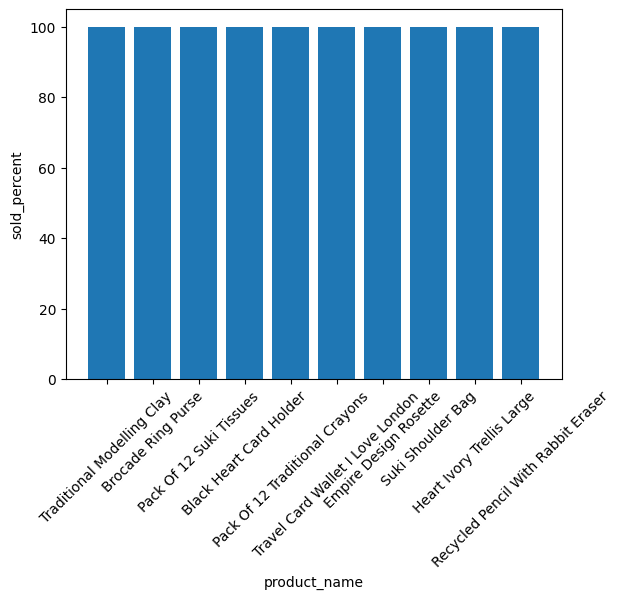

In [ ]:
_.bar()

#### Analysis for Question 1

##### About the Data
There are some discrepancies in the data as there are few products where the number of returns is higher than the number of sold
this can either be,
1. Due to some error in noting the quantites of the products
2. Or the returns were being noted at a delay which caused the past returns to show up after the returned products reached the warehouse
3. Or the returns of the product were happening outside the time frame of the transactional data

##### About the Results
After finding the Return to Sold Ratio to identify which products are being returned the most, we could come up to a few conclusions,
1. The Products that were being returned are mostly festival decorations, festive lighting or the stuff that can be returned after using.
- The products are being returned once the purpose is solved 
- Or the products have weak return policy or packagin clause
2. The Products that were having the Highest Sold Percentage are the products which are 
- Being used up once they are purchased 
- Or that cant be retuned due to the packaging clause of not using before return.

##### Conclusions and Recommendations 
1. The return policy for the decoration items and lightings can be reduced to ensure higher profit and less returns of the product, while the sales are high and the return matching those sales is low
2. The return policy for the products which are consumable or which can only be used by using them up can be further increased to attract customers with a longer return period


### Question 2
#### What orders with the highest quanties of a single product were canceled?

In order to do this, we collected the records of orders with the highest quantities of products (highest amount of quantities of one product in a single transaction). From there, we will add categories and analyze the reasons for returning or canceling the order. 
 
We start by filtering the number of orders with quantities greater than 1000. From there, we will order by product number and customer number, respectively. Then, we will specifically find those orders: orders with the same quantity from the same customers who also purchased and cancelled within a week. Finally, we will categorize and analyze the reasons for cancelling or returing.

In [ ]:
%%sql 
SELECT transactions.transaction_no,datedimension.date, product.product_no, price, quantity, customer.customer_no
FROM E_COMMERCE
JOIN transactions
    ON E_COMMERCE.transactions_key= transactions.key
JOIN datedimension
    ON E_COMMERCE.datedimension_key= datedimension.key
JOIN product
    ON E_COMMERCE.product_key=product.key
JOIN customer
    ON E_COMMERCE.customer_key=customer.key
WHERE quantity > 1000 OR quantity <-1000

GROUP BY transaction_no, date, product_no, price, quantity, customer_no
ORDER BY product_no, customer_no ASC 
LIMIT 115
;

 * postgresql://student@/e-commerce8
115 rows affected.


transaction_no,date,product_no,price,quantity,customer_no
556267,2019-06-09,15034,10.32,1200,13694
569214,2019-10-02,15034,10.32,1200,14533
C569552,2019-10-04,15034,10.32,-1200,14533
559047,2019-07-05,15036,10.99,1200,13082
543192,2019-02-04,15036,10.92,1200,17381
543991,2019-02-15,16014,10.58,1500,13848
564272,2019-08-24,16014,10.58,2000,16308
552172,2019-05-06,16014,10.58,2000,16308
573995,2019-11-02,16014,10.58,3000,16308
556267,2019-06-09,16216,10.31,1600,13694


In [ ]:
%%sql 
SELECT transactions.transaction_no,datedimension.date, product.product_no, price, quantity, customer.customer_no
FROM E_COMMERCE
JOIN transactions
    ON E_COMMERCE.transactions_key= transactions.key
JOIN datedimension
    ON E_COMMERCE.datedimension_key= datedimension.key
JOIN product
    ON E_COMMERCE.product_key=product.key
JOIN customer
    ON E_COMMERCE.customer_key=customer.key
WHERE quantity > 1000 OR quantity <-1000

GROUP BY transaction_no, date, product_no, price, quantity, customer_no
ORDER BY product_no, customer_no ASC 
LIMIT 5
;

 * postgresql://student@/e-commerce8
5 rows affected.


transaction_no,date,product_no,price,quantity,customer_no
556267,2019-06-09,15034,10.32,1200,13694
569214,2019-10-02,15034,10.32,1200,14533
C569552,2019-10-04,15034,10.32,-1200,14533
559047,2019-07-05,15036,10.99,1200,13082
543192,2019-02-04,15036,10.92,1200,17381


In [ ]:
from IPython.display import Image
Image(url="https://github.com/xinyili2022/dmfafinalproject/blob/main/q3differdatesameprice.jpg?raw=true")  

**Condition 1:** the same price returned on different dates. The reason may be the products could not meet the customers' expectations, and be returned within a short period of time(one week, as the setting of our project)

In [ ]:
from IPython.display import Image
Image(url="https://github.com/xinyili2022/dmfafinalproject/blob/main/q3samedatesameprice.jpg?raw=true")  

**Condition 2:** the same price returned on the same date. Because there is not enough time for purchasers to test the products, the reason is probably that the customers immediately regreted and asked for the return after the purchasing. And the sellers do not have to ship the goods in this condition.

In [ ]:
from IPython.display import Image
Image(url="https://github.com/xinyili2022/dmfafinalproject/blob/main/q3samedatedifferprice.jpg?raw=true", width = 600, height = 900) 
#edit this later 

**Condition 3** :different prices returned on the same day. There will be two sub_conditions in the cases. One for the for cancelling with a lower price, which might be caused by the pricematch rules or other changes in the prices, and the other one is for cancelling in a higher price which might be caused by the facts that the purchase used the giftcard or voucher to discount. Therefore, sellers might return all the amount of consumption while being request for the order cancelling.

**Conclusion and suggestions:** The ways of seeting the transction number should be changed to the rule that the operations for the same bunch of products should be set as the same digit number except for the letter C. For example, if the transaction number of the bunch of products is 123456 while purchasing, the transaction number of the bunch of products is C123456 while cancelling. Only in this way, it could be easier to chase, identify and analyse the track of the same bunch of products.

## Question 3
#### How can the company maximize profits?

### Part 1: Reducing Costs
The reason we want to look into returns is that it incurs administration and shipping costs to the company. 

##### Top 10 most returned items across all continents

In [ ]:
%%sql
SELECT p.product_no, p.product_name, e.price, SUM(e.quantity)*-1 as "No. of returns" 
FROM transactions as t, product as p, e_commerce as e  
WHERE p.key = e.product_key AND t.key = e.transactions_key AND t.transaction_no LIKE 'C%' 
GROUP BY p.product_name, p.product_no, e.price
ORDER BY "No. of returns" DESC
LIMIT 10

 * postgresql://student@/e-commerce8
10 rows affected.


product_no,product_name,price,No. of returns
23843,Paper Craft Little Birdie,6.19,80995
23166,Medium Ceramic Top Storage Jar,11.32,74466
84347,Rotating Silver Angels T-Light Hldr,10.28,9360
21108,Fairy Cake Flannel Assorted Colour,12.4,3114
20971,Pink Blue Felt Craft Trinket Box,11.34,2592
85123A,Cream Hanging Heart T-Light Holder,12.86,2451
21175,Gin And Tonic Diet Metal Sign,12.15,2001
22920,Herb Marker Basil,10.81,1515
47566B,Tea Time Party Bunting,12.86,1300
15034,Paper Pocket Traveling Fan,10.32,1223


Based on the 10 most returned items we found above, we will find out the number of purchase of them. 

In [ ]:
%%sql
SELECT p.product_no, p.product_name, e.price, SUM(e.quantity) as "No. of purchase"
FROM transactions as t, product as p, e_commerce as e 
WHERE p.key = e.product_key AND t.key = e.transactions_key AND (p.product_no = '23843' OR p.product_no = '23166' OR p.product_no = '84347' OR p.product_no = '21108' OR p.product_no = '20971' OR p.product_no = '85123A' OR p.product_no = '21175' OR p.product_no = '22920' OR p.product_no = '22273' OR p.product_no = '47566B') AND (NOT t.transaction_no LIKE 'C%')
GROUP BY p.product_name, p.product_no, e.price
ORDER BY "No. of purchase" DESC
LIMIT 10

 * postgresql://student@/e-commerce8
10 rows affected.


product_no,product_name,price,No. of purchase
23843,Paper Craft Little Birdie,12.38,80995
23166,Medium Ceramic Top Storage Jar,11.32,75847
85123A,Cream Hanging Heart T-Light Holder,12.86,18590
85123A,Cream Hanging Heart T-Light Holder,13.27,10578
21108,Fairy Cake Flannel Assorted Colour,12.4,6273
20971,Pink Blue Felt Craft Trinket Box,11.34,6012
21175,Gin And Tonic Diet Metal Sign,12.86,3960
20971,Pink Blue Felt Craft Trinket Box,11.53,3711
21108,Fairy Cake Flannel Assorted Colour,11.06,2625
84347,Rotating Silver Angels T-Light Hldr,12.86,2505


<BarContainer object of 10 artists>

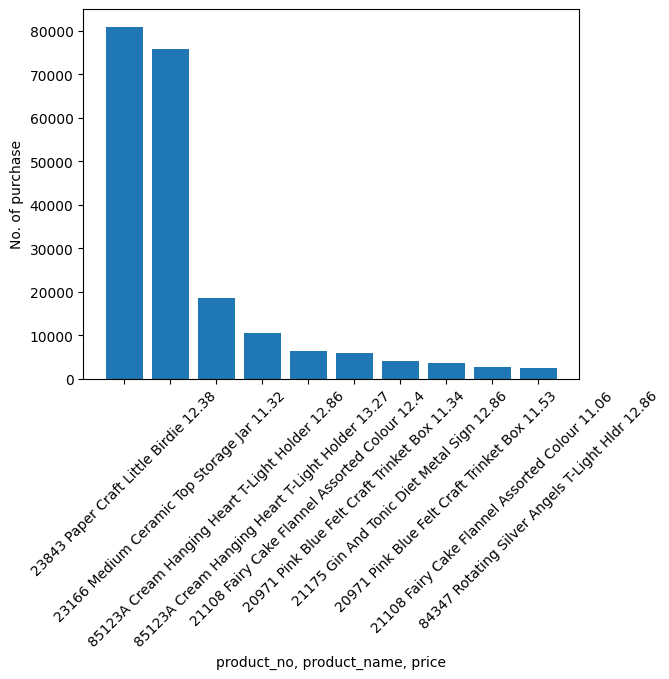

In [ ]:
_.bar()

Observations:
1) The most returned item was returned in full, which might be an order made by mistake, or that customers find the same product at a lower cost elsewhere.
2) The top 6 most returned items are > 10000 and the product names indicate that most of them are home decorations/homeware.

##### Top returned items in Africa

In [ ]:
%%sql
SELECT p.product_no, p.product_name, e.price, SUM(e.quantity)*-1 as "No. of returns" 
FROM transactions as t, product as p, e_commerce as e, location as l
WHERE p.key = e.product_key AND t.key = e.transactions_key AND l.key = e.location_key AND t.transaction_no LIKE 'C%' AND l.continent = 'Africa'
GROUP BY p.product_name, p.product_no, e.price
ORDER BY "No. of returns" DESC
LIMIT 10

 * postgresql://student@/e-commerce8
0 rows affected.


product_no,product_name,price,No. of returns


The reason for 0 return could be: 
1) The company does not support returns in Africa;
2) Return costs is high and it is borne by customers for African area;  
3) The customers are satisfied with their purchase;
4) Returns were made outside of the time period that the dataset covers.
 
To help us further determine the reason, we look at the overall total number of transactions made in Africa.

In [ ]:
%%sql
SELECT t.transaction_no, count (p.product_name), l.continent 
FROM transactions as t, location as l, e_commerce as e, product as p
WHERE t.key = e.transactions_key AND l.key = e.location_key AND l.continent = 'Africa' AND p.key = e.product_key
GROUP BY t.transaction_no, l.continent
ORDER BY t.transaction_no 

 * postgresql://student@/e-commerce8
1 rows affected.


transaction_no,count,continent
571035,57,Africa


Analysis: we can see that all 57 items sold are under the same transaction number, which means there was only 1 order made in Africa over the period the dataset covers. Since the amount of order is too small, we are unable to draw a solid conclusion on the reason why there is no return from Africa. A larger data pool in Africa is needed in order to determine the reason as the company expands their sales efforts in Africa. 

##### Top returned items in Asia

In [ ]:
%%sql
SELECT p.product_no, p.product_name, e.price, SUM(e.quantity)*-1 as "No. of returns" 
FROM transactions as t, product as p, e_commerce as e, location as l
WHERE p.key = e.product_key AND t.key = e.transactions_key AND l.key = e.location_key AND t.transaction_no LIKE 'C%' AND l.continent = 'Asia'
GROUP BY p.product_name, p.product_no, e.price
ORDER BY "No. of returns" DESC
LIMIT 10

 * postgresql://student@/e-commerce8
10 rows affected.


product_no,product_name,price,No. of returns
22328,Round Snack Boxes Set Of 4 Fruits,12.86,624
22088,Paper Bunting Coloured Lace,12.86,40
22466,Fairy Tale Cottage Night Light,6.19,17
20979,36 Pencils Tube Red Retrospot,11.53,16
23480,Mini Lights Woodland Mushrooms,6.19,15
21218,Red Spotty Biscuit Tin,13.58,13
22957,Set 3 Paper Vintage Chick Paper Egg,12.86,12
22364,Glass Jar Digestive Biscuits,12.86,9
23084,Rabbit Night Light,6.19,7
22637,Piggy Bank Retrospot,12.4,5


It is observed that the top returned item (Round Snack Boxes Set Of 4 Fruits) is significantly more than the rest so we want to focus on this item and look deeper to see from which countries the returns are from and whether the purchase and return date could explain the return.

In [ ]:
%%sql
SELECT t.transaction_no, c.customer_no, p.product_no, p.product_name, d.date, l.country, SUM(e.quantity) as "No. of purchase/returns (negative number = returns)" 
FROM transactions as t, product as p, e_commerce as e, location as l, datedimension as d, customer as c
WHERE p.key = e.product_key AND t.key = e.transactions_key AND l.key = e.location_key AND d.key = e.datedimension_key AND p.product_no = '22328' AND l.continent = 'Asia' AND c.key = e.customer_key
GROUP BY t.transaction_no, p.product_no, p.product_name, d.month, d.year, l.country, d.date, c.customer_no
ORDER BY d.date
LIMIT 10

 * postgresql://student@/e-commerce8
5 rows affected.


transaction_no,customer_no,product_no,product_name,date,country,No. of purchase/returns (negative number = returns)
537899,12755,22328,Round Snack Boxes Set Of 4 Fruits,2018-12-09,Japan,1488
C548731,12755,22328,Round Snack Boxes Set Of 4 Fruits,2019-04-04,Japan,-624
549738,16738,22328,Round Snack Boxes Set Of 4 Fruits,2019-04-12,Hong Kong,30
563613,12688,22328,Round Snack Boxes Set Of 4 Fruits,2019-08-18,Israel,12
572763,12812,22328,Round Snack Boxes Set Of 4 Fruits,2019-10-26,Japan,6


Judging from the transaction dates, we can focus on transactions on or before 4 April 2019 as that was the day when returns were made, which are the first 2 lines. By looking at the country of the return order, all returns of this product are from Japan in a single order by one customer. Tracing on the country, we can see that there's a bulk purchase of 1488 made in Dec 2018 in Japan by the same customer. 

Since the customer bought this item in bulk, it is reasonably to assume that he/she is a retailer re-selling the product in its own distributino channel. By looking at the purchase and return date, one of the possible reason is that the customer made the purchase was for the holiday season when people host gatherings and serve snacks. However, the sale might not be as good as expected so the customer returned the unsold products after the holidays. 

Since the return rate of this item is more than 40% (624/1488), we would recommend 
- the company produce fewer of this item in the future
- look into product reviews made by customers for product improvement (e.g. size/colour)

##### Top returned items in Europe

In [ ]:
%%sql
SELECT p.product_no, p.product_name, e.price, SUM(e.quantity)*-1 as "No. of returns" 
FROM transactions as t, product as p, e_commerce as e, location as l
WHERE p.key = e.product_key AND t.key = e.transactions_key AND l.key = e.location_key AND t.transaction_no LIKE 'C%' AND l.continent = 'Europe'
GROUP BY p.product_name, p.product_no, e.price
ORDER BY "No. of returns" DESC
LIMIT 10

 * postgresql://student@/e-commerce8
10 rows affected.


product_no,product_name,price,No. of returns
23843,Paper Craft Little Birdie,6.19,80995
23166,Medium Ceramic Top Storage Jar,11.32,74466
84347,Rotating Silver Angels T-Light Hldr,10.28,9360
21108,Fairy Cake Flannel Assorted Colour,12.4,3114
20971,Pink Blue Felt Craft Trinket Box,11.34,2592
85123A,Cream Hanging Heart T-Light Holder,12.86,2451
21175,Gin And Tonic Diet Metal Sign,12.15,2001
22920,Herb Marker Basil,10.81,1515
47566B,Tea Time Party Bunting,12.86,1300
15034,Paper Pocket Traveling Fan,10.32,1223


From the results above, we want to focus on the returns that are more than 10000, which are Paper Craft Little Birdie and Medium Ceramic Top Storage Jar. 
 
1) Paper Craft Little Birdie

In [ ]:
%%sql
SELECT t.transaction_no, c.customer_no, p.product_no, p.product_name, d.date, l.country, SUM(e.quantity) as "No. of purchase/returns (negative number = returns)" 
FROM transactions as t, product as p, e_commerce as e, location as l, datedimension as d, customer as c
WHERE p.key = e.product_key AND t.key = e.transactions_key AND l.key = e.location_key AND d.key = e.datedimension_key AND c.key = e.customer_key AND p.product_no = '23843' AND l.continent = 'Europe'
GROUP BY t.transaction_no, p.product_no, p.product_name, d.date, l.country, c.customer_no
ORDER BY d.date
LIMIT 10

 * postgresql://student@/e-commerce8
2 rows affected.


transaction_no,customer_no,product_no,product_name,date,country,No. of purchase/returns (negative number = returns)
581483,16446,23843,Paper Craft Little Birdie,2019-12-09,United Kingdom,80995
C581484,16446,23843,Paper Craft Little Birdie,2019-12-09,United Kingdom,-80995


It is observed that 
- both the purchase and return is made in a single order
- both the purchase and return is made on the same day
- both the puchase and return order is made by the same customer
- the return was made in full quantity (as the purchased quantity)
- there is only 1 purchase order made for this product
 
The transaction number indicates that it is a one single purchase order made by a single customer. Same for the return order.
 
Possible reasons for same-day return:
- order made by mistake
- the customer found the same item from elsewhere in a lower price
 
Recommendation for same-day return orders: it would be useful to email the particular customer to check for the return reasons. If the customer found the product elsewhere at a lower price, the company could consider matching the price difference to avoid the extra administrative and shipping costs, whichever is lower.

Something worth noting about this product is that it only has 1 purchase order throughout the time period the dataset covers, which doesn't speak well to its popularity. The company should drop this item from their website. 

2) Medium Ceramic Top Storage Jar

In [ ]:
%%sql
SELECT t.transaction_no, c.customer_no, p.product_no, p.product_name, d.date, l.country, SUM(e.quantity) as "No. of purchase/returns (negative number indicates returns)" 
FROM transactions as t, product as p, e_commerce as e, location as l, datedimension as d, customer as c
WHERE p.key = e.product_key AND t.key = e.transactions_key AND l.key = e.location_key AND d.key = e.datedimension_key AND c.key = e.customer_key AND p.product_no = '23166' AND l.continent = 'Europe'
GROUP BY t.transaction_no, p.product_no, p.product_name, d.date, l.country, c.customer_no
ORDER BY "No. of purchase/returns (negative number indicates returns)" desc
LIMIT 5

 * postgresql://student@/e-commerce8
5 rows affected.


transaction_no,customer_no,product_no,product_name,date,country,No. of purchase/returns (negative number indicates returns)
541431,12346,23166,Medium Ceramic Top Storage Jar,2019-01-18,United Kingdom,74215
561901,14156,23166,Medium Ceramic Top Storage Jar,2019-07-31,EIRE,288
553607,16684,23166,Medium Ceramic Top Storage Jar,2019-05-18,United Kingdom,240
561051,16684,23166,Medium Ceramic Top Storage Jar,2019-07-24,United Kingdom,144
552882,14646,23166,Medium Ceramic Top Storage Jar,2019-05-12,Netherlands,96


In [ ]:
%%sql
SELECT t.transaction_no, c.customer_no, p.product_no, p.product_name, d.date, l.country, SUM(e.quantity) as "No. of purchase/returns (negative number indicates returns)" 
FROM transactions as t, product as p, e_commerce as e, location as l, datedimension as d, customer as c
WHERE p.key = e.product_key AND t.key = e.transactions_key AND l.key = e.location_key AND d.key = e.datedimension_key AND c.key = e.customer_key AND p.product_no = '23166' AND l.continent = 'Europe'
GROUP BY t.transaction_no, p.product_no, p.product_name, d.date, l.country, c.customer_no
ORDER BY "No. of purchase/returns (negative number indicates returns)" 
LIMIT 5

 * postgresql://student@/e-commerce8
5 rows affected.


transaction_no,customer_no,product_no,product_name,date,country,No. of purchase/returns (negative number indicates returns)
C541433,12346,23166,Medium Ceramic Top Storage Jar,2019-01-18,United Kingdom,-74215
C557508,16684,23166,Medium Ceramic Top Storage Jar,2019-06-20,United Kingdom,-240
C562375,14911,23166,Medium Ceramic Top Storage Jar,2019-08-04,EIRE,-12
C554527,15251,23166,Medium Ceramic Top Storage Jar,2019-05-24,United Kingdom,-9
C567677,12409,23166,Medium Ceramic Top Storage Jar,2019-09-21,Switzerland,-2


It is observed that 
- the top purchase and return transaction is in a single order and made by the same customer on the same day
- the 2nd highest return order was made by the same customer roughly after 1 month of purchase
- only the top 2 returns were made in full quantity
 
Possible reasons for **same-day** return:
- order made by mistake
- the customer found the same item from elsewhere at a lower price
 
Recommendation for **same-day** return orders: it would be useful to email the particular customer to check for the return reasons. If the customer found the product elsewhere at a lower price, the company could consider matching the price difference to avoid the extra administrative and shipping costs, whichever is lower.
 
Possible reasons for return:
- unsatisfactory product
- delivery was late that the customer no longer needed the order

Recommmendation for return orders: the company can study the customer review to understand the reason for return. If the product is unsatisfactory, they can improve the product features/design in the production. If it was because of late delivery, they should look into their distrbution centre and delivery vendors to figure out what exactly caused the delay and fix it.

##### Top returned items in North America

In [ ]:
%%sql
SELECT p.product_no, p.product_name, e.price, SUM(e.quantity)*-1 as "No. of returns" 
FROM transactions as t, product as p, e_commerce as e, location as l
WHERE p.key = e.product_key AND t.key = e.transactions_key AND l.key = e.location_key AND t.transaction_no LIKE 'C%' AND l.continent = 'North America'
GROUP BY p.product_name, p.product_no, e.price
ORDER BY "No. of returns" DESC
LIMIT 10

 * postgresql://student@/e-commerce8
10 rows affected.


product_no,product_name,price,No. of returns
22492,Mini Paint Set Vintage,10.92,36
23158,Set Of 5 Lucky Cat Magnets,6.19,36
22706,Wrap Cowboys,10.68,25
22046,Tea Party Wrapping Paper,10.68,25
22050,Pink Paisley Rose Gift Wrap,10.68,25
22048,Birthday Banquet Gift Wrap,10.68,25
21498,Red Retrospot Wrap,10.68,25
21499,Blue Polkadot Wrap,10.68,25
22959,Wrap Christmas Village,10.68,25
22708,Wrap Dolly Girl,10.68,25


https://colab.research.google.com/drive/1UaLdb-7fB7uCDN-AmrMFdpLS17e7amj8#scrollTo=a4a84fec-4af1-4c0b-b10d-5a54fc90627eObservations:
- the quantity of items returned are fairly reasonable and there is no particularly high return items from North America
- 8 out of 10 top returned items were wrapping paper
- we are not diving into particular items since none of the return quantity is more than 100.

Analysis and recommendation: since the selling price of wrapping paper are on the low side in comparison to other products which we expect a low profit margin, shipping costs of return will further reduce the profit margin. Hence, we recommend the company not to include wrapping papers and other low-priced items in their return policy. 

##### Top returned items in Oceania

In [4]:
%%sql
SELECT p.product_no, p.product_name, e.price, SUM(e.quantity)*-1 as "No. of returns" 
FROM transactions as t, product as p, e_commerce as e, location as l
WHERE p.key = e.product_key AND t.key = e.transactions_key AND l.key = e.location_key AND t.transaction_no LIKE 'C%' AND l.continent = 'Oceania'
GROUP BY p.product_name, p.product_no, e.price
ORDER BY "No. of returns" DESC
LIMIT 10

 * postgresql://student@/e-commerce8
10 rows affected.


product_no,product_name,price,No. of returns
22738,Ribbon Reel Snowy Village,11.74,120
22990,Cotton Apron Pantry Design,14.61,100
22969,Homemade Jam Scented Candles,11.53,86
22492,Mini Paint Set Vintage,10.92,36
84978,Hanging Heart Jar T-Light Holder,11.34,36
21198,White Heart Confetti In Tube,11.94,24
22697,Green Regency Teacup And Saucer,12.86,24
22087,Paper Bunting White Lace,13.27,18
22090,Paper Bunting Retrospot,13.27,12
22232,Jigsaw Toadstools 3 Piece,11.94,8


Observation: The number of items returned appears reasonable and there is no particularly high return items from Oceania. However, we would still want to look into the top 2 return products - Ribbon Reel Snowy Village and Cotton Apron Pantry Design, which have more than 100 items returned to see how they do in sales.

1. Ribbon Reel Snowy Village

In [5]:
%%sql
SELECT t.transaction_no, c.customer_no, p.product_no, p.product_name, d.date, SUM(e.quantity) as "No. of purchase/returns (negative number = returns)" 
FROM transactions as t, product as p, e_commerce as e, location as l, datedimension as d, customer as c
WHERE p.key = e.product_key AND t.key = e.transactions_key AND l.key = e.location_key AND d.key = e.datedimension_key AND c.key = e.customer_key AND p.product_no = '22738' AND l.continent = 'Oceania'
GROUP BY t.transaction_no, p.product_no, p.product_name, d.date, c.customer_no
ORDER BY t.transaction_no 
LIMIT 10

 * postgresql://student@/e-commerce8
3 rows affected.


transaction_no,customer_no,product_no,product_name,date,No. of purchase/returns (negative number = returns)
541422,12422,22738,Ribbon Reel Snowy Village,2019-01-17,2
563614,12415,22738,Ribbon Reel Snowy Village,2019-08-18,120
C574019,12415,22738,Ribbon Reel Snowy Village,2019-11-02,-120


2. Cotton Apron Pantry Design

In [8]:
%%sql
SELECT t.transaction_no, c.customer_no, p.product_no, p.product_name, d.date, SUM(e.quantity) as "No. of purchase/returns (negative number = returns)" 
FROM transactions as t, product as p, e_commerce as e, location as l, datedimension as d, customer as c
WHERE p.key = e.product_key AND t.key = e.transactions_key AND l.key = e.location_key AND d.key = e.datedimension_key AND c.key = e.customer_key AND p.product_no = '22990' AND l.continent = 'Oceania'
GROUP BY t.transaction_no, p.product_no, p.product_name, d.date, c.customer_no
ORDER BY t.transaction_no 
LIMIT 10

 * postgresql://student@/e-commerce8
2 rows affected.


transaction_no,customer_no,product_no,product_name,date,No. of purchase/returns (negative number = returns)
543989,12415,22990,Cotton Apron Pantry Design,2019-02-15,100
C551348,12415,22990,Cotton Apron Pantry Design,2019-04-28,-100


Observation:
- From the product name, we can know that it is kitchenware instead of seasonal products like other products available in the website. 
- Over the time period of the dataset covers, this item is only sold in 1 orders, which got fully returned 2 months later. The sale of this product in Oceania is not great.
 
Recommendation:
- Look at customer reviews for feedback on this product and possibly the reasons for return
- Drop this product in Oceania due to low level of sales. If this product is not popular and cannot be sold, it will take up warehouse space and increase costs as well.


##### Top returned items in South America

In [ ]:
%%sql
SELECT p.product_no, p.product_name, SUM(e.quantity)*-1 as "No. of returns" 
FROM transactions as t, product as p, e_commerce as e, location as l
WHERE p.key = e.product_key AND t.key = e.transactions_key AND l.key = e.location_key AND t.transaction_no LIKE 'C%' AND l.continent = 'South America'
GROUP BY p.product_name, p.product_no
ORDER BY "No. of returns" DESC
LIMIT 10

 * postgresql://student@/e-commerce8
0 rows affected.


product_no,product_name,No. of returns


Similar to Africa, the reason for 0 return could be:
1) The company does not support returns in South America;
2) Return costs is high and it is borne by customers in South America;  
3) The customers are satisfied with their purchase;
4) Returns were made outside of the time period that the dataset covers.

To help us further determine the reason, we look at the overall total number of transactions made in South America.

In [ ]:
%%sql
SELECT t.transaction_no, count (p.product_name), l.continent 
FROM transactions as t, location as l, e_commerce as e, product as p
WHERE t.key = e.transactions_key AND l.key = e.location_key AND l.continent = 'South America' AND p.key = e.product_key
GROUP BY t.transaction_no, l.continent
ORDER BY t.transaction_no 

 * postgresql://student@/e-commerce8
1 rows affected.


transaction_no,count,continent
550201,31,South America


Analysis: The result in South American is the same as Africa. We can see that all 31 products sold are under the same transaction number, which means there was only 1 order made in South American over the period the dataset covers. Since the amount of order is too small, we are unable to draw a solid conclusion on the reason why there is no return from South American. A larger data pool in South American is needed in order to determine the reason as the company expands their sales efforts in South American. 

##### Top returned items in unknown locations

In [6]:
%%sql
SELECT p.product_no, p.product_name, SUM(e.quantity)*-1 as "No. of returns" 
FROM transactions as t, product as p, e_commerce as e, location as l
WHERE p.key = e.product_key AND t.key = e.transactions_key AND l.key = e.location_key AND t.transaction_no LIKE 'C%' AND l.continent = 'Unknown'
GROUP BY p.product_name, p.product_no
ORDER BY "No. of returns" DESC
LIMIT 10

 * postgresql://student@/e-commerce8
0 rows affected.


product_no,product_name,No. of returns


Similar to Africa and South America, the reason for 0 return could be:
1) The company does not support returns in South America;
2) Return costs is high and it is borne by customers in South America;  
3) The customers are satisfied with their purchase;
4) Returns were made outside of the time period that the dataset covers.

To help us further determine the reason, we want to look at the overall total number of transactions made in these unknown locations.

In [7]:
%%sql
SELECT t.transaction_no, count (p.product_name), l.continent 
FROM transactions as t, location as l, e_commerce as e, product as p
WHERE t.key = e.transactions_key AND l.key = e.location_key AND l.continent = 'Unknown' AND p.key = e.product_key
GROUP BY t.transaction_no, l.continent
ORDER BY t.transaction_no 

 * postgresql://student@/e-commerce8
13 rows affected.


transaction_no,count,continent
538635,53,Unknown
539265,1,Unknown
549687,16,Unknown
552695,47,Unknown
553857,11,Unknown
557499,9,Unknown
559521,72,Unknown
559929,15,Unknown
561658,83,Unknown
561661,51,Unknown


Analysis: We can see there are in total 13 purchase orders made from unknown locations. Since the amount of orders is rather small, we are unable to draw a solid conclusion on the reasons why there is no return from unknown locations. It could be due to local logistical reasons or customers are simply satisfied with their puchases. A larger data pool in the unknown locations, or if possible, exact location information is needed in order to determine the reasons. 

### Part 2: Increasing Sales

We decided to answer by finding what is the most important time of the year to order products, both by looking at total amount ordered per quarter and total amount ordered per continent. We also wanted to look at what are the most popular products are for corresponding markets during each quarter. We also wanted to look at individual consumer purchasing habits, by finding who the customers with the highest total purchases are and what the most popular products were in the time period. 

#### Observing Customer Loyalty

In [ ]:
%%sql
SELECT DISTINCT(c.customer_no), COUNT(t.transaction_no),l.continent
FROM customer AS c, E_COMMERCE AS e, location as l, transactions as t
WHERE c.key = e.customer_key and l.key=e.location_key and t.key=e.transactions_key
GROUP BY c.customer_no,l.continent,e.quantity
ORDER BY COUNT(t.transaction_no) DESC LIMIT 30;

 * postgresql://student@/e-commerce8
30 rows affected.


customer_no,count,continent
17841,4291,Europe
14096,2352,Europe
12748,2283,Europe
14606,1872,Europe
17841,1608,Europe
14911,1568,Europe
14096,970,Europe
14911,865,Europe
12748,842,Europe
18118,771,Europe


Based on the data above, we see that the customers who have the most purchases in this time period come from Europe, demonstrating strong brand loyalty among the European markets. In order to continue appealing to this group, we recommend that the company create special incentives, prehaps a loyalty program, that 

#### Observing Product Sales 
We wanted to look into what the  most popular products, their corresponding prices, and how many times they were purchased within the time period

In [ ]:
%%sql
SELECT COUNT(p.product_name), p.product_name, e.price as Price 
FROM PRODUCT AS p, E_COMMERCE AS e  
WHERE p.key = e.product_key 
GROUP BY p.product_name,e.price 
ORDER BY COUNT(p.product_name) DESC LIMIT 10;
#why does this have less purchases than below?

 * postgresql://student@/e-commerce8
10 rows affected.


count,product_name,price
1645,Cream Hanging Heart T-Light Holder,13.27
1464,Regency Cakestand 3 Tier,23.32
1307,Assorted Colour Bird Ornament,11.98
1220,Lunch Bag Red Retrospot,5.97
1204,Party Bunting,15.32
1133,Set Of 3 Cake Tins Pantry Design,15.32
1092,Jumbo Bag Red Retrospot,6.19
1023,Lunch Bag Suki Design,5.97
1020,Lunch Bag Black Skull,5.97
1000,Jumbo Bag Vintage Doily,6.19


<BarContainer object of 10 artists>

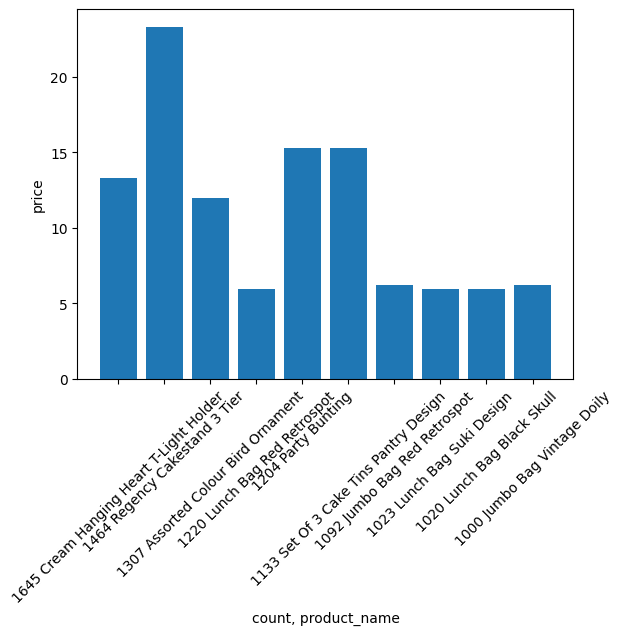

In [ ]:
_.bar()

The most popular product is 'Cream Hanging Heart T-Light Holder' and it was purchased 1,645 times during the time period. 

In [ ]:
%%sql
SELECT DISTINCT(l.continent),COUNT(p.product_name),p.product_name,MIN(e.price) as MINPRICE, MAX(e.price) as MAXPRICE
FROM LOCATION AS l,PRODUCT as p, E_COMMERCE AS e 
WHERE  p.key = e.product_key AND l.key= e.location_key AND p.product_name = 'Cream Hanging Heart T-Light Holder'
GROUP BY l.continent,p.product_name
ORDER BY COUNT(p.product_name) DESC;

 * postgresql://student@/e-commerce8
4 rows affected.


continent,count,product_name,minprice,maxprice
Europe,2372,Cream Hanging Heart T-Light Holder,5.97,17.19
Asia,4,Cream Hanging Heart T-Light Holder,12.86,13.27
Oceania,1,Cream Hanging Heart T-Light Holder,13.27,13.27
Unknown,1,Cream Hanging Heart T-Light Holder,13.27,13.27


<BarContainer object of 4 artists>

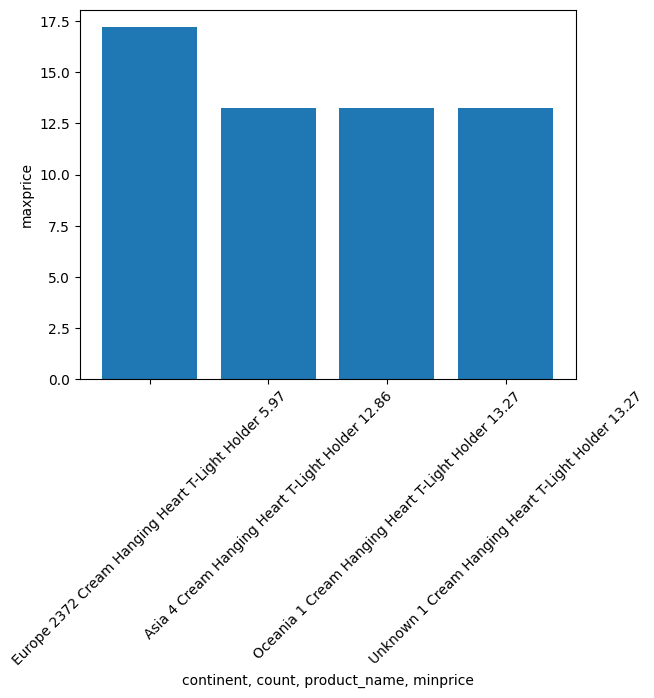

In [ ]:
_.bar()

This is the query to get most popular products in the world along with their min and max price by grouping continent and it is found that europe has most of the customers. The most popular product is cream hanging heart with a count of 2378 . And if we group the query by continent we can see that the top most item bought is cream hanging heart with a count of 2364 which shows that europe made approximately 90 percent sales of that product

Same case with the second most popular product as well


In [ ]:
%%sql
SELECT DISTINCT(l.continent),COUNT(p.product_name),p.product_name,MIN(e.price) as MINPRICE, MAX(e.price) as MAXPRICE
FROM LOCATION AS l,PRODUCT as p, E_COMMERCE AS e 
WHERE  p.key = e.product_key AND l.key= e.location_key AND p.product_name = 'Regency Cakestand 3 Tier'
GROUP BY l.continent,p.product_name
ORDER BY COUNT(p.product_name) DESC;

 * postgresql://student@/e-commerce8
7 rows affected.


continent,count,product_name,minprice,maxprice
Europe,2178,Regency Cakestand 3 Tier,5.97,36.38
Asia,8,Regency Cakestand 3 Tier,21.47,23.32
Oceania,6,Regency Cakestand 3 Tier,21.47,23.32
North America,4,Regency Cakestand 3 Tier,23.32,35.83
Unknown,2,Regency Cakestand 3 Tier,23.32,23.32
Africa,1,Regency Cakestand 3 Tier,23.32,23.32
South America,1,Regency Cakestand 3 Tier,21.47,21.47


<BarContainer object of 7 artists>

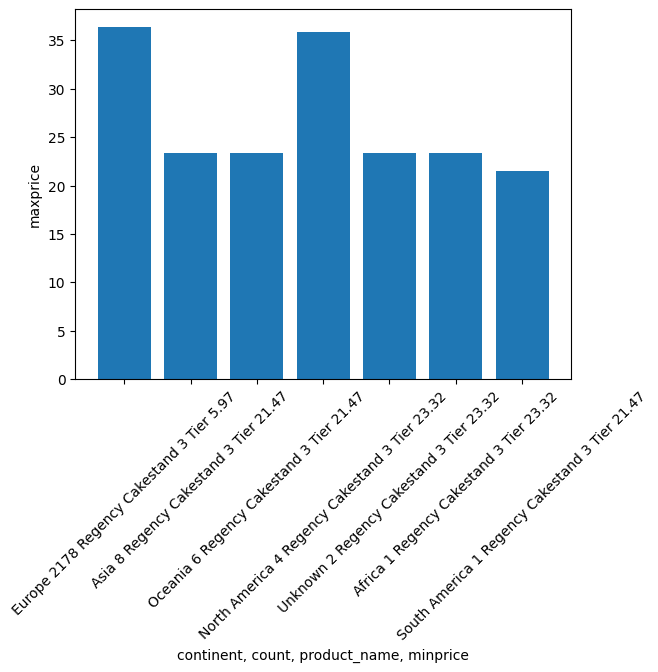

In [ ]:
_.bar()

In [ ]:
%%sql
SELECT DISTINCT(l.continent),COUNT(p.product_name),p.product_name,MIN(e.price) as MINPRICE, MAX(e.price) as MAXPRICE
FROM LOCATION AS l,PRODUCT as p, E_COMMERCE AS e 
WHERE  p.key = e.product_key AND l.key= e.location_key AND p.product_name = 'Regency Cakestand 3 Tier'
GROUP BY l.continent,p.product_name
ORDER BY COUNT(p.product_name) DESC;

 * postgresql://student@/e-commerce8
7 rows affected.


continent,count,product_name,minprice,maxprice
Europe,2178,Regency Cakestand 3 Tier,5.97,36.38
Asia,8,Regency Cakestand 3 Tier,21.47,23.32
Oceania,6,Regency Cakestand 3 Tier,21.47,23.32
North America,4,Regency Cakestand 3 Tier,23.32,35.83
Unknown,2,Regency Cakestand 3 Tier,23.32,23.32
Africa,1,Regency Cakestand 3 Tier,23.32,23.32
South America,1,Regency Cakestand 3 Tier,21.47,21.47


From the above results , we can say that europe has the highest number of customers.
There can be two reasons for this:
1. Since its a UK based company
2. May be because of the shipping price. There is no shipping price column in the data we extracted. If there is info about the shipping price , it could help to analyse why only europe has the most number of sales.As we know that , if the continent is far from the base company , shipping price would increase. 
There might be a chance that there are less customers in continents other than europe because of the shipping price factor. 

#### Total Transactions per Quarter

We also wanted to look into purchasing habits per quarter and per region. We first looked into the total number of transactions per quarter. We see here that quarter 4 is the most popular time to purchase items. This could be due to the holiday season, and also because we have more data from quarter 4 months in 2018 and 2019. 

In [ ]:
%%sql 
SELECT DISTINCT(d.quarter), COUNT(t.transaction_no)
FROM datedimension AS d, transactions AS t, E_COMMERCE AS e
WHERE d.key = e.datedimension_key AND t.key = e.transactions_key
GROUP BY quarter
ORDER BY COUNT(t.transaction_no) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
4 rows affected.


quarter,count
4,211647
3,123743
2,102484
1,98476


<BarContainer object of 4 artists>

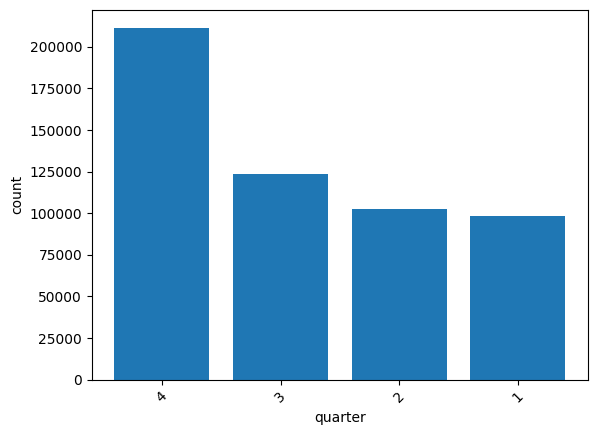

In [ ]:
_.bar()

We see here that most transactions are made in the fourth quarter (October to December, which is right around the holidays). This can also be attributed to more data being given in the set that is from quarter 4. We will dive deeper into this, and look into whether this is a trend in all continents. 

In [ ]:
%%sql
SELECT DISTINCT(l.continent), COUNT(p.product_name)
FROM location AS l, PRODUCT AS p, E_COMMERCE AS e 
WHERE p.key = e.product_key AND l.key = e.location_key
GROUP BY l.continent 
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
7 rows affected.


continent,count
Europe,532346
Oceania,1704
Asia,1236
North America,529
Unknown,447
Africa,57
South America,31


<BarContainer object of 7 artists>

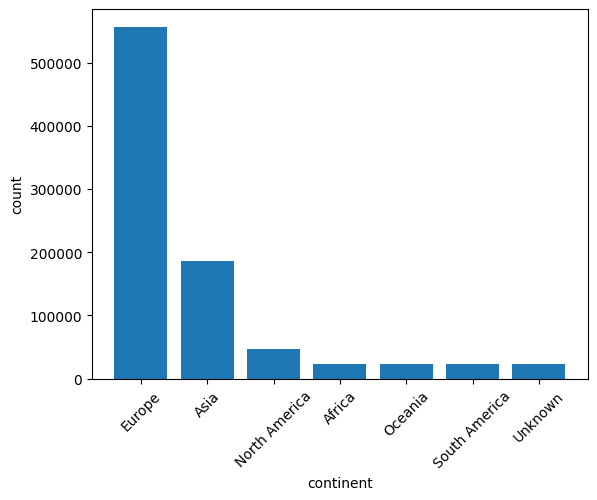

In [ ]:
_.bar()

We see here that most transactions are made by those who are based in Europe. This makes sense, as the company is based in the United Kingdom and most of their customers are probably based in that region.

#### Regions with more orders per quarter

In [ ]:
%%sql
SELECT DISTINCT(l.continent), COUNT(d.quarter)
FROM LOCATION AS l, DATEDIMENSION AS d, E_COMMERCE
WHERE 
 d.key = e_commerce.datedimension_key AND l.key = e_commerce.location_key AND d.quarter = '1'
Group by l.continent
ORDER BY COUNT(d.quarter) DESC LIMIT 30;

 * postgresql://student@/e-commerce8
4 rows affected.


continent,count
Europe,97382
Oceania,743
Asia,341
North America,10


<BarContainer object of 4 artists>

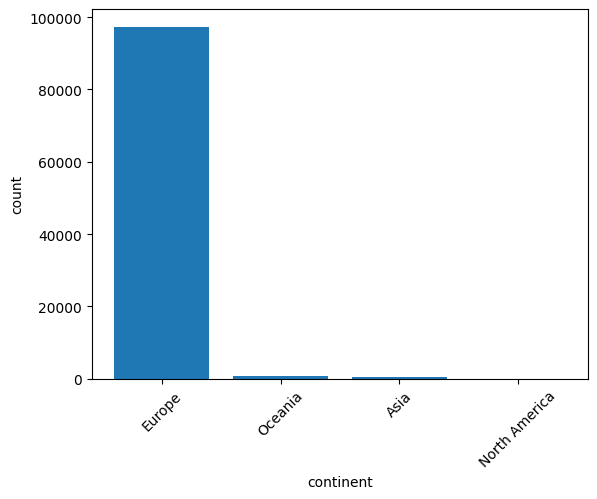

In [ ]:
_.bar()

In [ ]:
%%sql
SELECT DISTINCT(l.continent), COUNT(d.quarter)
FROM LOCATION AS l, DATEDIMENSION AS d, E_COMMERCE
WHERE 
 d.key = e_commerce.datedimension_key AND l.key = e_commerce.location_key AND d.quarter = '2'
Group by l.continent
ORDER BY COUNT(d.quarter) DESC LIMIT 30;

 * postgresql://student@/e-commerce8
6 rows affected.


continent,count
Europe,101729
Oceania,324
Asia,237
Unknown,83
North America,80
South America,31


<BarContainer object of 6 artists>

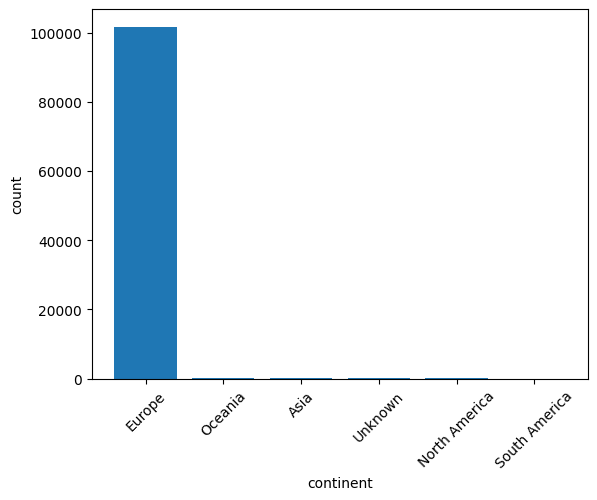

In [ ]:
_.bar()

In [ ]:
%%sql
SELECT DISTINCT(l.continent), COUNT(d.quarter)
FROM LOCATION AS l, DATEDIMENSION AS d, E_COMMERCE
WHERE 
 d.key = e_commerce.datedimension_key AND l.key = e_commerce.location_key AND d.quarter = '3'
Group by l.continent
ORDER BY COUNT(d.quarter) DESC LIMIT 30;

 * postgresql://student@/e-commerce8
5 rows affected.


continent,count
Europe,122450
Oceania,428
Asia,417
Unknown,310
North America,138


<BarContainer object of 5 artists>

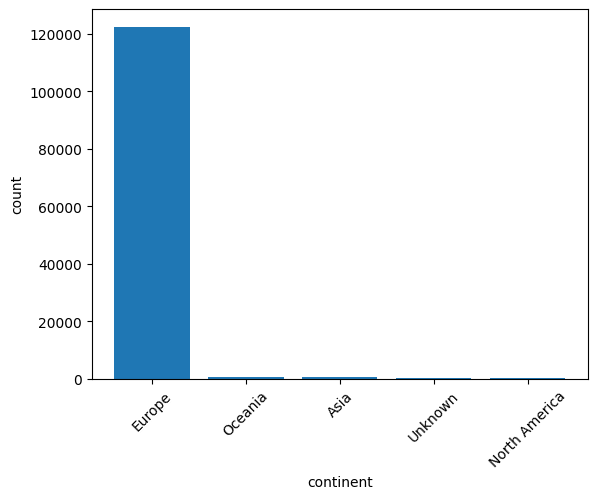

In [ ]:
_.bar()

In [ ]:
%%sql
SELECT DISTINCT(l.continent), COUNT(d.quarter)
FROM LOCATION AS l, DATEDIMENSION AS d, E_COMMERCE
WHERE 
 d.key = e_commerce.datedimension_key AND l.key = e_commerce.location_key AND d.quarter = '4'
Group by l.continent
ORDER BY COUNT(d.quarter) DESC LIMIT 30;

 * postgresql://student@/e-commerce8
6 rows affected.


continent,count
Europe,210785
North America,301
Asia,241
Oceania,209
Africa,57
Unknown,54


<BarContainer object of 6 artists>

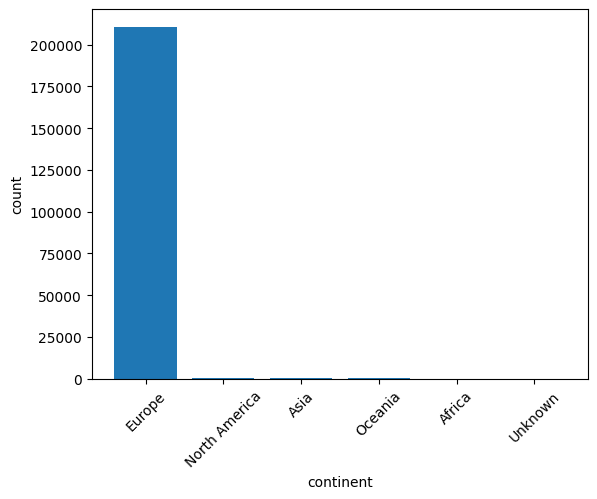

In [ ]:
_.bar()

Throughout all quarters, we see that the majority of order have come from consumers based in Europe. In quarter 1, 2 and 3, we see that the region with the second and third highest amount of orders are Oceania and Asia, respectively. However, we see that change in quarter 4, when the region with the second highest amount of orders is North America. This could possibly be associated with the holiday season being during quarter 4, with holidays such as Christmas and Hannukah being more celebrated by those in Europe and North America vs. other regions in the world. 

As mentioned above, we see that the most popular time to order from the website based on continent is during quarter 4 for European and North America consumers. However, we see that for customers in Africa, they prefer to order during quarter 4, while those based in Asia order the most during quarter 3. In comparison, consumers based in Oceania (Australia) prefer to order during quarter 1. 

During the less popular quarters in respective continents, it would be wise to increase marketing efforts (social media strategy, etc.) and sales efforts (i.e offering special bulk deals, etc.) in order to increase brand awareness. With this in mind, we will investigate each region individually and look at their most popular quarters and their most popular products to order per quarter. 

#### Most popular quarters to order and most popular items ordered per Quarter - Europe

In [ ]:
%%sql
SELECT DISTINCT(d.quarter), l.continent, COUNT(p.product_name)
FROM LOCATION AS l, DATEDIMENSION AS d, PRODUCT AS p, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND l.continent = 'Europe' 
Group by l.continent, d.quarter
ORDER BY d.quarter LIMIT 30;

 * postgresql://student@/e-commerce8
4 rows affected.


quarter,continent,count
1,Europe,97382
2,Europe,101729
3,Europe,122450
4,Europe,210785


<BarContainer object of 4 artists>

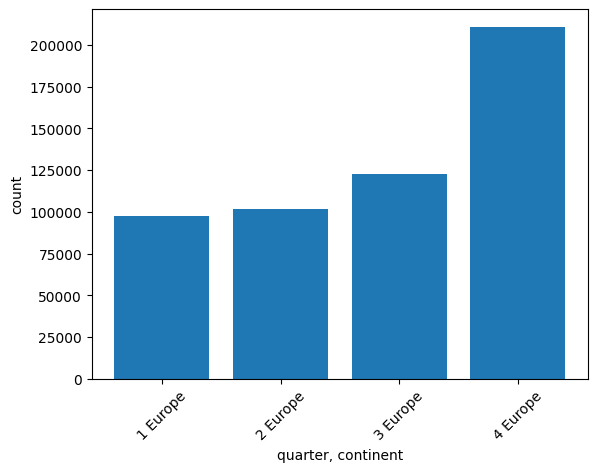

In [ ]:
_.bar()

This query shows us the most popular time to order by consumers in Europe is Q4, while the least popular time to order in Europe is quarter 1. 

In [ ]:
%%sql
SELECT p.product_name, l.continent, MIN(e.quantity), MAX(e.quantity), SUM(e.quantity) AS total_quantity_ordered, COUNT(p.product_name) AS number_of_orders
FROM PRODUCT AS p, LOCATION AS l, DATEDIMENSION AS d, TRANSACTIONS AS t, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND t.key = e.transactions_key AND l.continent = 'Europe' AND d.quarter = '1'
Group by p.product_name, l.continent, e.quantity
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


product_name,continent,min,max,total_quantity_ordered,number_of_orders
Set Of 3 Cake Tins Pantry Design,Europe,3,3,579,193
Pack Of 72 Retrospot Cake Cases,Europe,24,24,3384,141
Regency Cakestand 3 Tier,Europe,1,1,134,134
Cream Hanging Heart T-Light Holder,Europe,6,6,804,134
Jam Making Set Printed,Europe,12,12,1596,133
Natural Slate Heart Chalkboard,Europe,6,6,786,131
Jam Making Set With Jars,Europe,6,6,780,130
Jumbo Bag Red Retrospot,Europe,10,10,1240,124
Assorted Colour Bird Ornament,Europe,8,8,968,121
Set Of 6 Spice Tins Pantry Design,Europe,4,4,476,119


<BarContainer object of 10 artists>

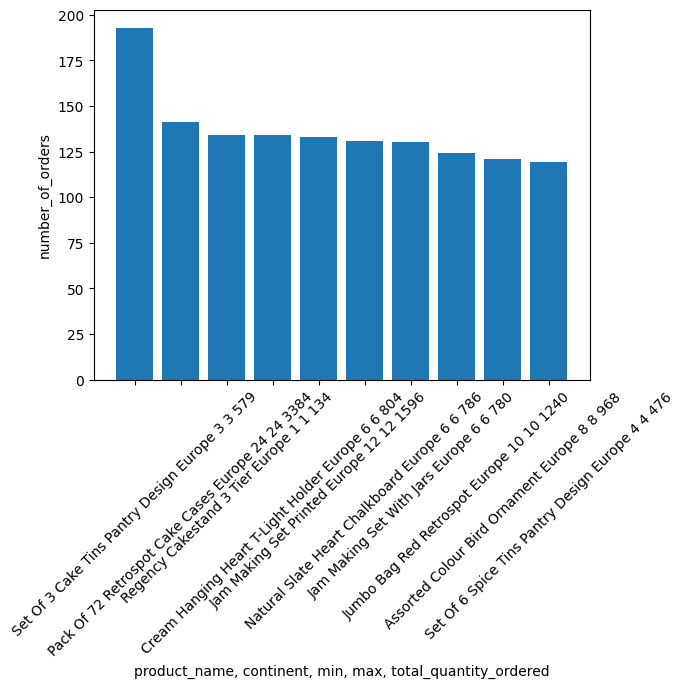

In [ ]:
_.bar()

In [ ]:
%%sql
SELECT p.product_name, l.continent, MIN(e.quantity), MAX(e.quantity), SUM(e.quantity) AS total_quantity_ordered, COUNT(p.product_name) AS number_of_orders
FROM PRODUCT AS p, LOCATION AS l, DATEDIMENSION AS d, TRANSACTIONS AS t, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND t.key = e.transactions_key AND l.continent = 'Europe' AND d.quarter = '2'
Group by p.product_name, l.continent, e.quantity
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


product_name,continent,min,max,total_quantity_ordered,number_of_orders
Party Bunting,Europe,4,4,776,194
Lunch Bag Red Retrospot,Europe,10,10,1710,171
Jumbo Bag Red Retrospot,Europe,10,10,1690,169
Lunch Bag Apple Design,Europe,10,10,1670,167
Pack Of 72 Retrospot Cake Cases,Europe,24,24,3864,161
Cream Hanging Heart T-Light Holder,Europe,6,6,924,154
Jumbo Bag Vintage Doily,Europe,10,10,1490,149
Lunch Bag Vintage Doily,Europe,10,10,1490,149
Regency Cakestand 3 Tier,Europe,2,2,286,143
Regency Cakestand 3 Tier,Europe,1,1,140,140


In [ ]:
%%sql
SELECT p.product_name, l.continent, MIN(e.quantity), MAX(e.quantity), SUM(e.quantity) AS total_quantity_ordered, COUNT(p.product_name) AS number_of_orders
FROM PRODUCT AS p, LOCATION AS l, DATEDIMENSION AS d, TRANSACTIONS AS t, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND t.key = e.transactions_key AND l.continent = 'Europe' AND d.quarter = '3'
Group by p.product_name, l.continent, e.quantity
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


product_name,continent,min,max,total_quantity_ordered,number_of_orders
Jumbo Bag Vintage Doily,Europe,10,10,2350,235
Set Of 3 Regency Cake Tins,Europe,4,4,940,235
Lunch Bag Vintage Doily,Europe,10,10,2280,228
Jumbo Bag Red Retrospot,Europe,10,10,2150,215
Lunch Bag Red Retrospot,Europe,10,10,1960,196
Lunch Bag Apple Design,Europe,10,10,1830,183
Lunch Bag Black Skull,Europe,10,10,1670,167
Jumbo Bag Vintage Leaf,Europe,10,10,1620,162
Jumbo Bag Alphabet,Europe,10,10,1580,158
Lunch Bag Suki Design,Europe,10,10,1570,157


<BarContainer object of 10 artists>

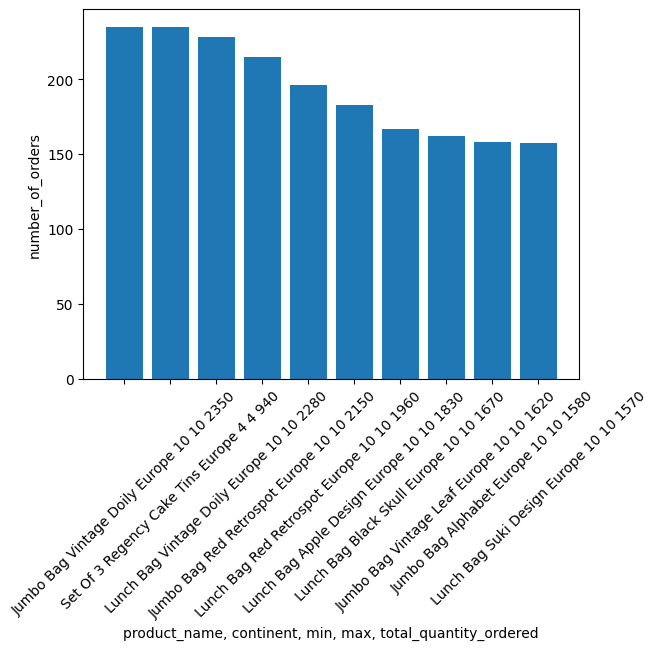

In [ ]:
_.bar()

In [ ]:
%%sql
SELECT p.product_name, l.continent, MIN(e.quantity), MAX(e.quantity), SUM(e.quantity) AS total_quantity_ordered, COUNT(p.product_name) AS number_of_orders
FROM PRODUCT AS p, LOCATION AS l, DATEDIMENSION AS d, TRANSACTIONS AS t, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND t.key = e.transactions_key AND l.continent = 'Europe' AND d.quarter = '4'
Group by p.product_name, l.continent, e.quantity
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


product_name,continent,min,max,total_quantity_ordered,number_of_orders
Rex Cash+Carry Jumbo Shopper,Europe,1,1,257,257
Assorted Colour Bird Ornament,Europe,8,8,1712,214
Jumbo Bag Red Retrospot,Europe,10,10,2120,212
Paper Chain Kit 50'S Christmas,Europe,6,6,1188,198
Regency Cakestand 3 Tier,Europe,1,1,194,194
Hand Warmer Owl Design,Europe,12,12,2088,174
Set Of 3 Cake Tins Pantry Design,Europe,3,3,513,171
Jumbo Bag 50'S Christmas,Europe,10,10,1660,166
Jumbo Bag Vintage Doily,Europe,10,10,1660,166
Cream Hanging Heart T-Light Holder,Europe,6,6,984,164


<BarContainer object of 10 artists>

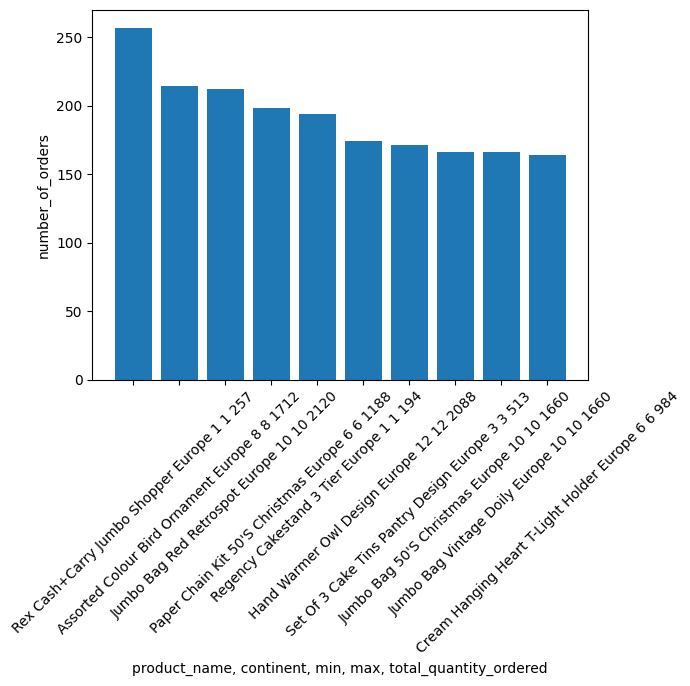

In [ ]:
_.bar()

##### Analysis
We see here that Jumbo Bag Red Retrospot is consistenly one of the most purchased product by European consumers throughout every quarter, and other products by Jumbo Bag such as the Vintage Doily and Black Leaf. Since these products are consistenly popular among European consumers, it would be appropreate to slightly increase the price of this product in this region in order to increase revenue. Furthermore, to have more variety in the products purchased by consumers based in Europe, we suggest that other less products are either advertised more or the prices of those products are marked down. We also see that there are a number of individual consumers purchasing these products for individual use vs. purchasing for reselling purposes. 

#### Most popular quarters to order and most popular items ordered per Quarter - Asia

In [ ]:
%%sql
SELECT DISTINCT(d.quarter), l.continent, COUNT(p.product_name)
FROM LOCATION AS l, DATEDIMENSION AS d, PRODUCT AS p, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND l.continent = 'Asia' 
Group by l.continent, d.quarter
ORDER BY d.quarter LIMIT 30;

 * postgresql://student@/e-commerce8
4 rows affected.


quarter,continent,count
1,Asia,341
2,Asia,237
3,Asia,417
4,Asia,241


<BarContainer object of 4 artists>

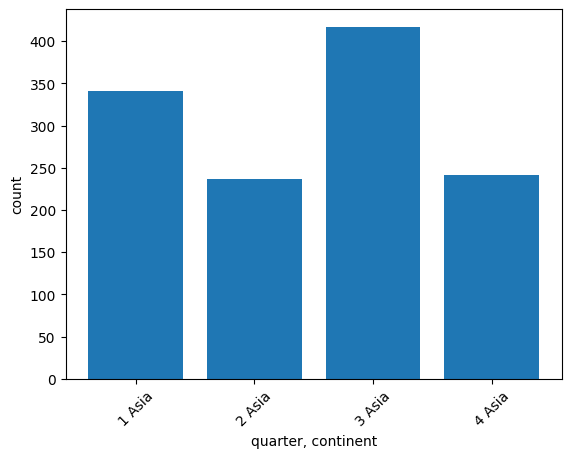

In [ ]:
_.bar()

In [ ]:
%%sql
SELECT p.product_name, l.continent, MIN(e.quantity), MAX(e.quantity), SUM(e.quantity) AS total_quantity_ordered, COUNT(p.product_name) AS number_of_orders
FROM PRODUCT AS p, LOCATION AS l, DATEDIMENSION AS d, TRANSACTIONS AS t, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND t.key = e.transactions_key AND l.continent = 'Asia' AND d.quarter = '1'
Group by p.product_name, l.continent, e.quantity
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


product_name,continent,min,max,total_quantity_ordered,number_of_orders
Red Retrospot Childrens Umbrella,Asia,6,6,18,3
Milk Pan Pink Polkadot,Asia,4,4,8,2
Assorted Colour Mini Cases,Asia,6,6,12,2
Ladies & Gentlemen Metal Sign,Asia,6,6,12,2
Measuring Tape Babushka Pink,Asia,24,24,48,2
Measuring Tape Babushka Red,Asia,24,24,48,2
Beware Of The Cat Metal Sign,Asia,12,12,24,2
Bath Building Block Word,Asia,6,6,12,2
Jam Making Set With Jars,Asia,12,12,24,2
Laundry 15c Metal Sign,Asia,12,12,24,2


<BarContainer object of 10 artists>

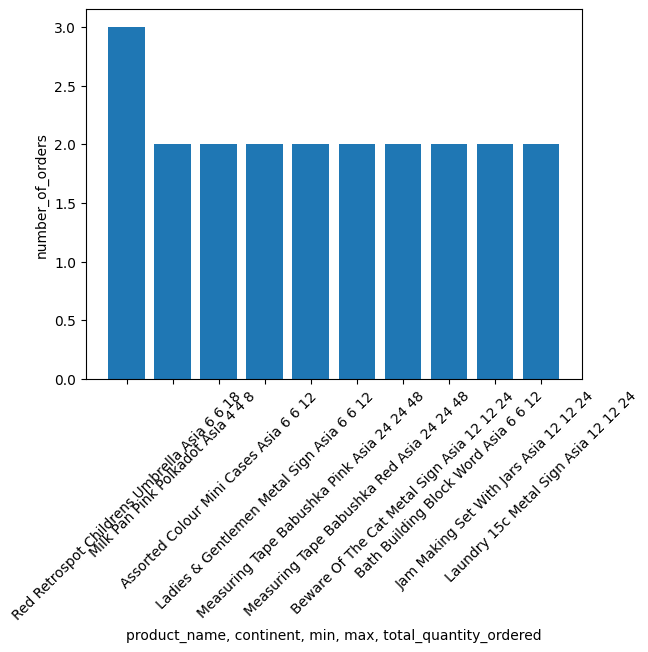

In [ ]:
_.bar()

In [ ]:
%%sql
SELECT p.product_name, l.continent, MIN(e.quantity), MAX(e.quantity), SUM(e.quantity) AS total_quantity_ordered, COUNT(p.product_name) AS number_of_orders
FROM PRODUCT AS p, LOCATION AS l, DATEDIMENSION AS d, TRANSACTIONS AS t, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND t.key = e.transactions_key AND l.continent = 'Asia' AND d.quarter = '2'
Group by p.product_name, l.continent, e.quantity
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


product_name,continent,min,max,total_quantity_ordered,number_of_orders
Strawberry Picnic Bag,Asia,50,50,100,2
Abc Treasure Book Box,Asia,8,8,8,1
Balloon Water Bomb Pack Of 35,Asia,9,9,9,1
Apple Bath Sponge,Asia,10,10,10,1
Assorted Monkey Suction Cup Hook,Asia,48,48,48,1
Bag 125g Swirly Marbles,Asia,48,48,48,1
Abc Treasure Book Box,Asia,32,32,32,1
Bank Account Greeting Card,Asia,72,72,72,1
Basket Of Toadstools,Asia,120,120,120,1
Abc Treasure Book Box,Asia,-4,-4,-4,1


<BarContainer object of 10 artists>

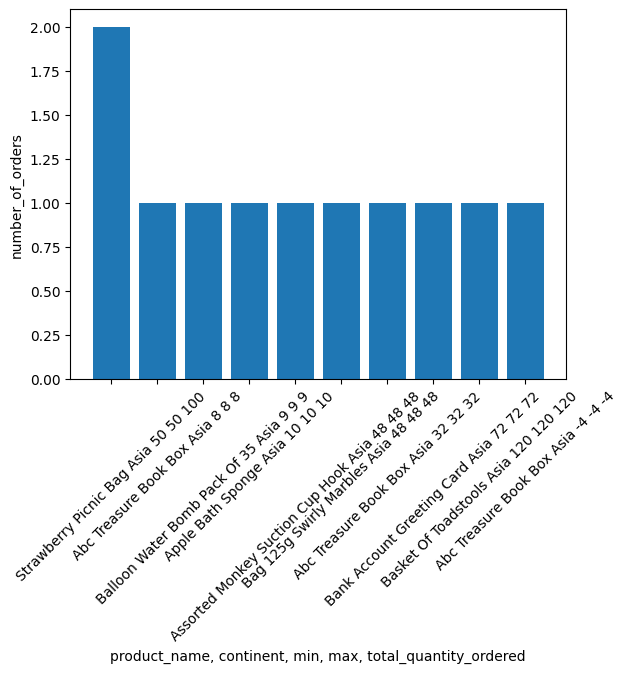

In [ ]:
_.bar()

In [ ]:
%%sql
SELECT p.product_name, l.continent, MIN(e.quantity), MAX(e.quantity), SUM(e.quantity) AS total_quantity_ordered, COUNT(p.product_name) AS number_of_orders
FROM PRODUCT AS p, LOCATION AS l, DATEDIMENSION AS d, TRANSACTIONS AS t, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND t.key = e.transactions_key AND l.continent = 'Asia' AND d.quarter = '3'
Group by p.product_name, l.continent, e.quantity
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


product_name,continent,min,max,total_quantity_ordered,number_of_orders
Spaceboy Lunch Box,Asia,12,12,36,3
Dolly Girl Lunch Box,Asia,12,12,36,3
Metal Sign Cupcake Single Hook,Asia,8,8,24,3
Set Of 4 Knick Knack Tins Doily,Asia,48,48,96,2
Rose Du Sud Cushion Cover,Asia,2,2,4,2
Set Of 6 Snack Loaf Baking Cases,Asia,8,8,16,2
Blue Diner Wall Clock,Asia,12,12,24,2
6 Ribbons Rustic Charm,Asia,12,12,24,2
Set Of 10 Led Dolly Lights,Asia,2,2,4,2
Woodland Charlotte Bag,Asia,10,10,20,2


<BarContainer object of 10 artists>

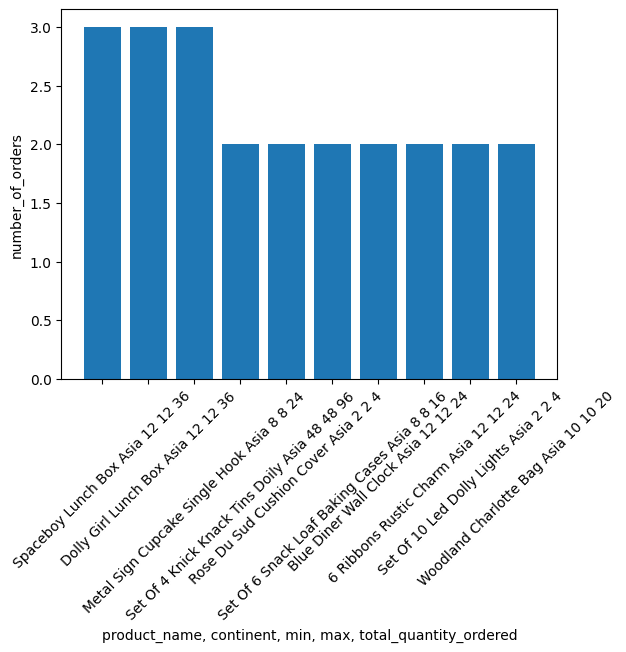

In [ ]:
_.bar()

In [ ]:
%%sql
SELECT p.product_name, l.continent, MIN(e.quantity), MAX(e.quantity), SUM(e.quantity) AS total_quantity_ordered, COUNT(p.product_name) AS number_of_orders
FROM PRODUCT AS p, LOCATION AS l, DATEDIMENSION AS d, TRANSACTIONS AS t, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND t.key = e.transactions_key AND l.continent = 'Asia' AND d.quarter = '4'
Group by p.product_name, l.continent, e.quantity
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


product_name,continent,min,max,total_quantity_ordered,number_of_orders
Set Of 3 Notebooks In Parcel,Asia,1,1,2,2
Card Circus Parade,Asia,12,12,24,2
Picture Dominoes,Asia,72,72,144,2
Vintage Paisley Stationery Set,Asia,1,1,2,2
Cream Hanging Heart T-Light Holder,Asia,1,1,2,2
Advent Calendar Gingham Sack,Asia,3,3,3,1
60 Cake Cases Dolly Girl Design,Asia,24,24,24,1
4 Traditional Spinning Tops,Asia,24,24,24,1
Baking Set 9 Piece Retrospot,Asia,3,3,3,1
5 Hook Hanger Red Magic Toadstool,Asia,48,48,48,1


<BarContainer object of 10 artists>

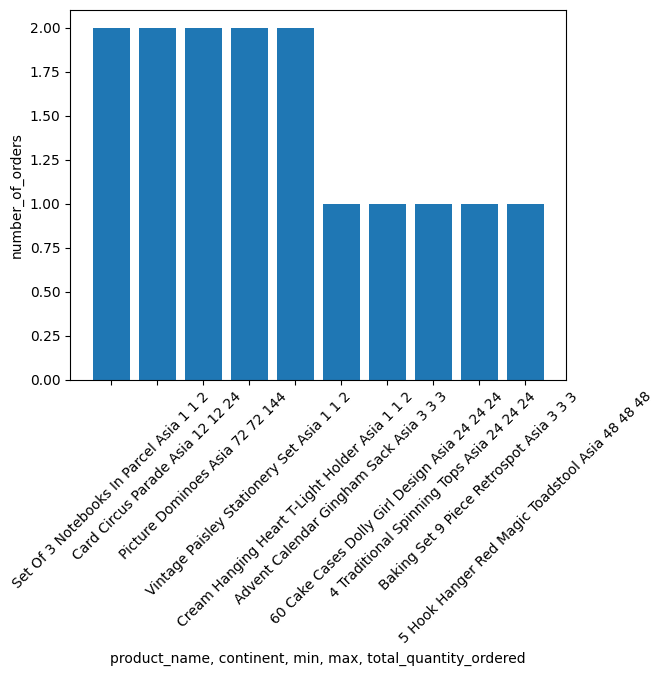

In [ ]:
_.bar()

##### Analysis
Based on the most popular products purchased during by consumers based in Asia, we see that there are more orders products purchased in bulk throughout all four quarters when compared to the European market. This suggests to us that there are more customers in Asia that are potentially resellers than other continents the company ships to. Furthermore, we also see that the top 10 products purchased in each quarter change every quarter. We also see that there are significantly less purchases during quarter 2 and quarter 4, which is unique to this market. Another purchasing habit that is unique to the Asian market is that, when compared to the European and North American markets, we do not see that sudden drop in sales during quarter 1 (after quarter 4).  

To combat this, we recommend the client to increase promotion through offering sales or increasing marketing during quarter 4 that specifically target these customers in the Asian market. Furthermore, the company should focus on increasing sales in the Asian market, specifically during quarter 1, in order to offset for steep decline in sales from European customers and North American customers.

#### Most popular quarters to order and most popular items ordered per Quarter - South America

In [ ]:
%%sql
SELECT DISTINCT(d.quarter), l.continent, COUNT(p.product_name)
FROM LOCATION AS l, DATEDIMENSION AS d, PRODUCT AS p, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND l.continent = 'South America' 
Group by l.continent, d.quarter
ORDER BY d.quarter LIMIT 30;

 * postgresql://student@/e-commerce8
1 rows affected.


quarter,continent,count
2,South America,31


<BarContainer object of 1 artists>

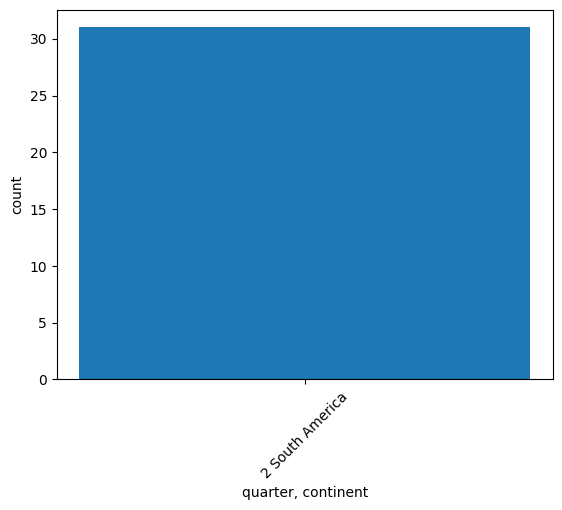

In [ ]:
_.bar()

In [ ]:
%%sql
SELECT p.product_name, l.continent, MIN(e.quantity), MAX(e.quantity), SUM(e.quantity) AS total_quantity_ordered, COUNT(p.product_name) AS number_of_orders
FROM PRODUCT AS p, LOCATION AS l, DATEDIMENSION AS d, TRANSACTIONS AS t, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND t.key = e.transactions_key AND l.continent = 'South America' AND d.quarter = '2'
Group by p.product_name, l.continent, e.quantity
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


product_name,continent,min,max,total_quantity_ordered,number_of_orders
Cook With Wine Metal Sign,South America,12,12,12,1
Dolly Girl Lunch Box,South America,24,24,24,1
Doormat Airmail,South America,10,10,10,1
Edwardian Parasol Natural,South America,3,3,3,1
Edwardian Parasol Pink,South America,3,3,3,1
Edwardian Parasol Red,South America,3,3,3,1
Emergency First Aid Tin,South America,12,12,12,1
First Aid Tin,South America,6,6,6,1
Green Regency Teacup And Saucer,South America,24,24,24,1
Clock Magnet Mum's Kitchen,South America,6,6,6,1


<BarContainer object of 10 artists>

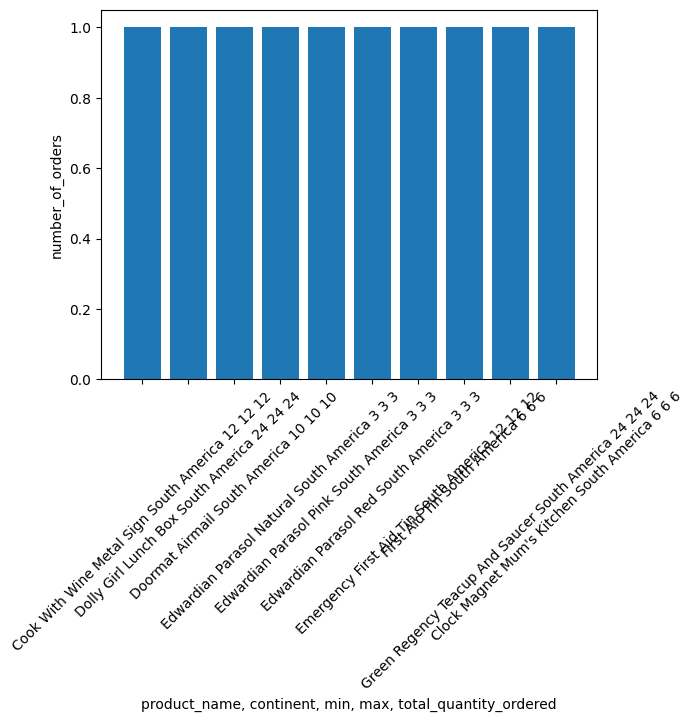

In [ ]:
_.bar()

##### Analysis
When looking at the top products purchased in various quarters by consumers based in South America, we observed that there were only items purchased during quarter 2. This could either be due to missing data for this quarter, or the fact that there simply were no other purchases during this time. The items purchased during this quarter, for the most part, seemed to follow a few patterns. The Edwardian Parasol (in various colors) appear some of the highest purchased products by consumers in South America. Knowing this, we recommend this be investigated further to see if this has been a trend in previous years.

We recommend that the company increase efforts to appeal to more consumers in this region by taking initative such as offering special sales to customers who are potentially resellers. Furthermore, possibly increasing inventory of items and procuring and/or producing similar items that appeal to consumers from this region are recommended. It would also be wise to look at competitors in the South American market and analyze their strategy.

#### Most popular quarters to order and most popular items ordered per Quarter - North America

In [ ]:
%%sql
SELECT DISTINCT(d.quarter), l.continent, COUNT(p.product_name)
FROM LOCATION AS l, DATEDIMENSION AS d, PRODUCT AS p, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND l.continent = 'North America' 
Group by l.continent, d.quarter
ORDER BY d.quarter LIMIT 30;

 * postgresql://student@/e-commerce8
4 rows affected.


quarter,continent,count
1,North America,10
2,North America,80
3,North America,138
4,North America,301


<BarContainer object of 4 artists>

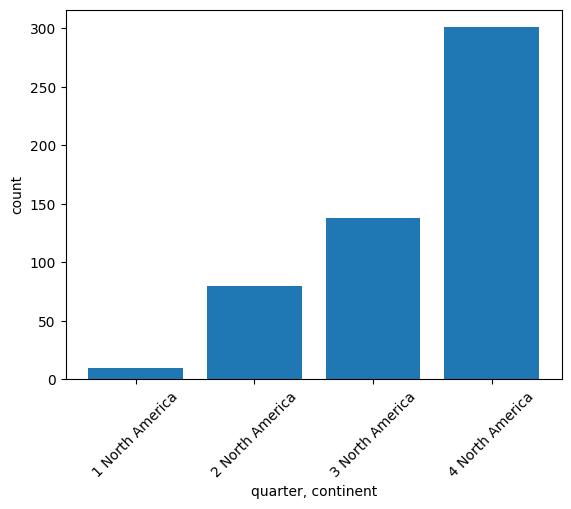

In [ ]:
_.bar()

In [ ]:
%%sql
SELECT p.product_name, l.continent, MIN(e.quantity), MAX(e.quantity), SUM(e.quantity) AS total_quantity_ordered, COUNT(p.product_name) AS number_of_orders
FROM PRODUCT AS p, LOCATION AS l, DATEDIMENSION AS d, TRANSACTIONS AS t, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND t.key = e.transactions_key AND l.continent = 'North America' AND d.quarter = '1'
Group by p.product_name, l.continent, e.quantity
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


product_name,continent,min,max,total_quantity_ordered,number_of_orders
Assorted Colour Bird Ornament,North America,8,8,8,1
Black Candelabra T-Light Holder,North America,6,6,6,1
Box Of 9 Pebble Candles,North America,12,12,12,1
Colour Glass T-Light Holder Hanging,North America,16,16,16,1
Hanging Jam Jar T-Light Holders,North America,12,12,12,1
Moroccan Tea Glass,North America,12,12,12,1
Painted Metal Pears Assorted,North America,8,8,8,1
Silver Standing Gnome,North America,4,4,4,1
Tumbler Baroque,North America,6,6,6,1
Vintage Union Jack Cushion Cover,North America,4,4,4,1


<BarContainer object of 10 artists>

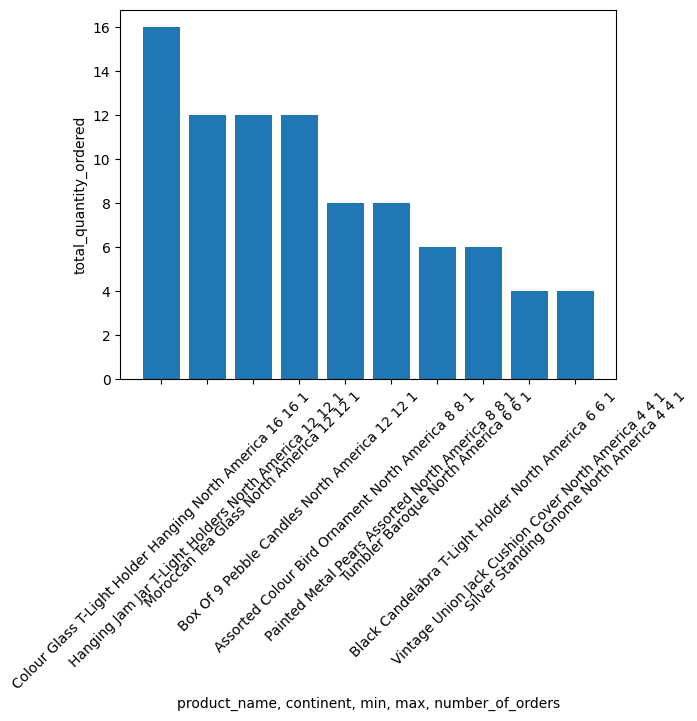

In [ ]:
_.bar()

In [ ]:
%%sql
SELECT p.product_name, l.continent, MIN(e.quantity), MAX(e.quantity), SUM(e.quantity) AS total_quantity_ordered, COUNT(p.product_name) AS number_of_orders
FROM PRODUCT AS p, LOCATION AS l, DATEDIMENSION AS d, TRANSACTIONS AS t, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND t.key = e.transactions_key AND l.continent = 'North America' AND d.quarter = '2'
Group by p.product_name, l.continent, e.quantity
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


product_name,continent,min,max,total_quantity_ordered,number_of_orders
Colouring Pencils Brown Tube,North America,20,20,40,2
Abc Treasure Book Box,North America,8,8,8,1
Baking Set 9 Piece Retrospot,North America,6,6,6,1
Airline Bag Vintage World Champion,North America,4,4,4,1
Alarm Clock Bakelike Orange,North America,4,4,4,1
Alarm Clock Bakelike Red,North America,4,4,4,1
Adult Apron Apple Delight,North America,4,4,4,1
Baking Set Spaceboy Design,North America,6,6,6,1
Black Baroque Carriage Clock,North America,2,2,2,1
60 Cake Cases Dolly Girl Design,North America,24,24,24,1


<BarContainer object of 10 artists>

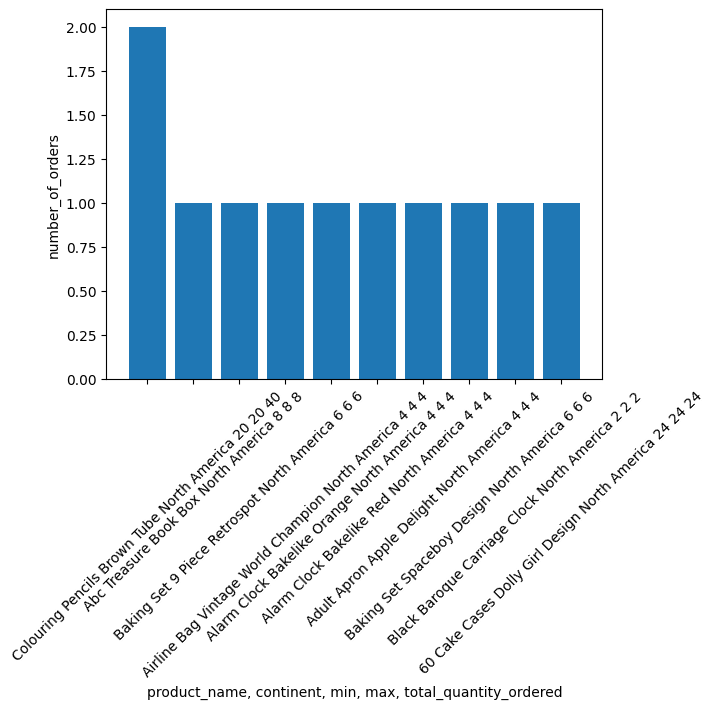

In [ ]:
_.bar()

In [ ]:
%%sql
SELECT p.product_name, l.continent, MIN(e.quantity), MAX(e.quantity), SUM(e.quantity) AS total_quantity_ordered, COUNT(p.product_name) AS number_of_orders
FROM PRODUCT AS p, LOCATION AS l, DATEDIMENSION AS d, TRANSACTIONS AS t, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND t.key = e.transactions_key AND l.continent = 'North America' AND d.quarter = '3'
Group by p.product_name, l.continent, e.quantity
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


product_name,continent,min,max,total_quantity_ordered,number_of_orders
Metal Sign Cupcake Single Hook,North America,8,8,16,2
3d Traditional Christmas Stickers,North America,1,1,1,1
Alarm Clock Bakelike Pink,North America,3,3,3,1
4 Traditional Spinning Tops,North America,12,12,12,1
Alarm Clock Bakelike Chocolate,North America,1,1,1,1
Alarm Clock Bakelike Green,North America,2,2,2,1
3d Vintage Christmas Stickers,North America,3,3,3,1
Alarm Clock Bakelike Red,North America,1,1,1,1
Bag 125g Swirly Marbles,North America,12,12,12,1
12 Pencils Tall Tube Posy,North America,24,24,24,1


<BarContainer object of 10 artists>

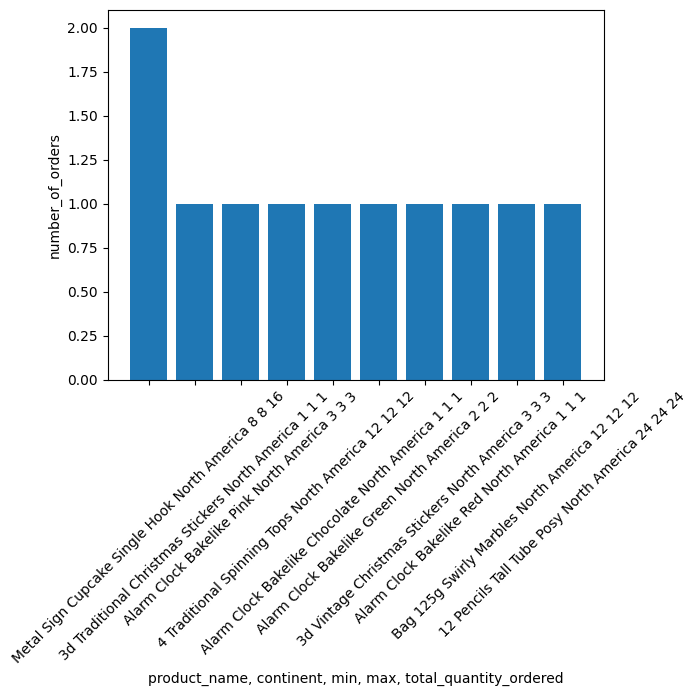

In [ ]:
_.bar()

In [ ]:
%%sql
SELECT p.product_name, l.continent, MIN(e.quantity), MAX(e.quantity), SUM(e.quantity) AS total_quantity_ordered, COUNT(p.product_name) AS number_of_orders
FROM PRODUCT AS p, LOCATION AS l, DATEDIMENSION AS d, TRANSACTIONS AS t, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND t.key = e.transactions_key AND l.continent = 'North America' AND d.quarter = '4'
Group by p.product_name, l.continent, e.quantity
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


product_name,continent,min,max,total_quantity_ordered,number_of_orders
Jam Jar With Pink Lid,North America,2,2,4,2
Set Of 6 Ribbons Vintage Christmas,North America,6,6,12,2
Childrens Cutlery Dolly Girl,North America,4,4,8,2
Embroidered Ribbon Reel Susie,North America,6,6,12,2
Round Snack Boxes Set Of4 Woodland,North America,6,6,12,2
Set 6 School Milk Bottles In Crate,North America,24,24,48,2
Card Dolly Girl,North America,-12,-12,-24,2
Card Dolly Girl,North America,12,12,24,2
Childrens Cutlery Spaceboy,North America,4,4,8,2
Set Of 6 Soldier Skittles,North America,4,4,8,2


<BarContainer object of 10 artists>

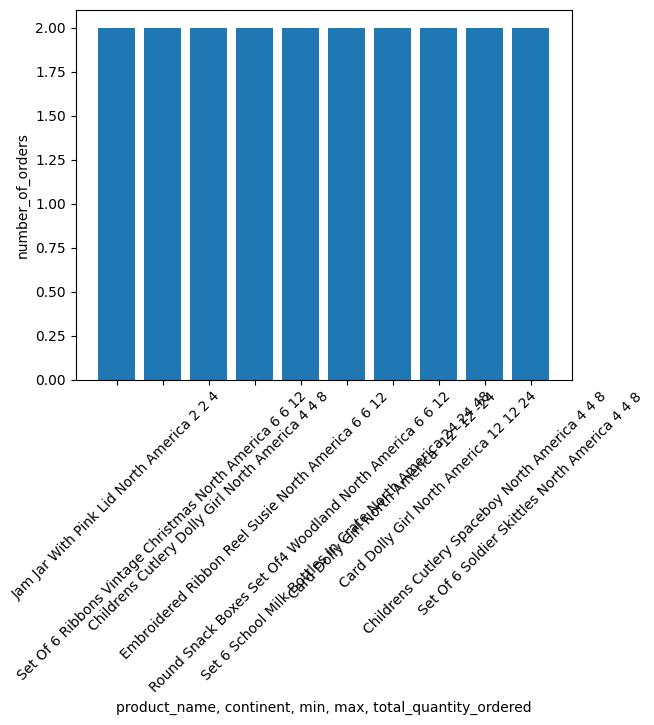

In [ ]:
_.bar()

##### Analysis
Similarly to the European market, we see here that quarter 4 has the highest sales North American consumers, while quarter 1 has the lowest sales. This could be attributed the the holiday season being a popular shopping time for consumers in the West, and the end of (potential) holiday sales. We also observe that the orders in quarter 4 are all bulk orders (operating under the assumption that a bulk order is any order that has a quantity higher than 25 pieces), while quarter 1 does not contain any bulk orders. Quarter 2 and 3 both also contain a majority of bulk orders. This suggests that North American-based customers who purchase from this store may potentially be resellers. We recommend that this goes into merchandise planning for next year, and for the client to ensure that these popular pieces in quarter 4 are readily available to ship for Q4 of 2020. 

#### Most popular quarters to order and most popular items ordered per Quarter - Oceania

In [ ]:
%%sql
SELECT DISTINCT(d.quarter), l.continent, COUNT(p.product_name)
FROM LOCATION AS l, DATEDIMENSION AS d, PRODUCT AS p, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND l.continent = 'Oceania' 
Group by l.continent, d.quarter
ORDER BY d.quarter LIMIT 30;

 * postgresql://student@/e-commerce8
4 rows affected.


quarter,continent,count
1,Oceania,743
2,Oceania,324
3,Oceania,428
4,Oceania,209


<BarContainer object of 4 artists>

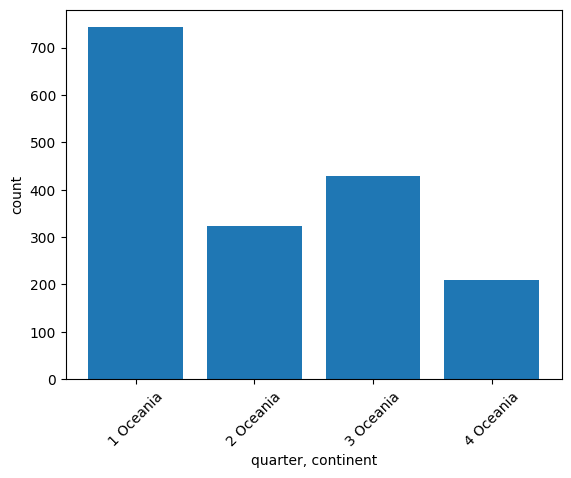

In [ ]:
_.bar()

In [ ]:
%%sql
SELECT p.product_name, l.continent, MIN(e.quantity), MAX(e.quantity), SUM(e.quantity) AS total_quantity_ordered, COUNT(p.product_name) AS number_of_orders
FROM PRODUCT AS p, LOCATION AS l, DATEDIMENSION AS d, TRANSACTIONS AS t, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND t.key = e.transactions_key AND l.continent = 'Oceania' AND d.quarter = '1'
Group by p.product_name, l.continent, e.quantity
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


product_name,continent,min,max,total_quantity_ordered,number_of_orders
Memo Board Cottage Design,Oceania,24,24,72,3
Squarecushion Cover Pink Union Jack,Oceania,4,4,12,3
Circus Parade Lunch Box,Oceania,128,128,256,2
Charlotte Bag Pink Polkadot,Oceania,10,10,20,2
Childs Breakfast Set Circus Parade,Oceania,24,24,48,2
Childs Breakfast Set Spaceboy,Oceania,24,24,48,2
Blue Polkadot Cup,Oceania,96,96,192,2
Blue Harmonica In Box,Oceania,240,240,480,2
4 Traditional Spinning Tops,Oceania,160,160,320,2
Blue Polkadot Plate,Oceania,96,96,192,2


<BarContainer object of 10 artists>

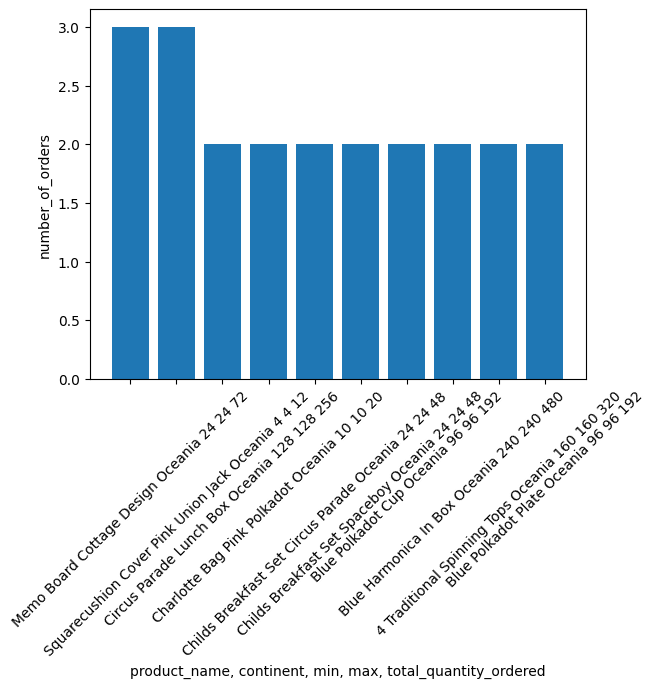

In [ ]:
_.bar()

In [ ]:
%%sql
SELECT p.product_name, l.continent, MIN(e.quantity), MAX(e.quantity), SUM(e.quantity) AS total_quantity_ordered, COUNT(p.product_name) AS number_of_orders
FROM PRODUCT AS p, LOCATION AS l, DATEDIMENSION AS d, TRANSACTIONS AS t, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND t.key = e.transactions_key AND l.continent = 'Oceania' AND d.quarter = '2'
Group by p.product_name, l.continent, e.quantity
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


product_name,continent,min,max,total_quantity_ordered,number_of_orders
Lunch Bag Spaceboy Design,Oceania,10,10,30,3
Baking Set Spaceboy Design,Oceania,3,3,9,3
Roses Regency Teacup And Saucer,Oceania,24,24,48,2
Fawn Blue Hot Water Bottle,Oceania,6,6,12,2
Baking Set 9 Piece Retrospot,Oceania,3,3,6,2
Multi Colour Silver T-Light Holder,Oceania,24,24,48,2
Doormat Union Flag,Oceania,10,10,20,2
Feltcraft Doll Molly,Oceania,6,6,12,2
Doormat Welcome To Our Home,Oceania,2,2,4,2
Set Of 6 Soldier Skittles,Oceania,80,80,160,2


In [ ]:
%%sql
SELECT p.product_name, l.continent, MIN(e.quantity), MAX(e.quantity), SUM(e.quantity) AS total_quantity_ordered, COUNT(p.product_name) AS number_of_orders
FROM PRODUCT AS p, LOCATION AS l, DATEDIMENSION AS d, TRANSACTIONS AS t, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND t.key = e.transactions_key AND l.continent = 'Oceania' AND d.quarter = '3'
Group by p.product_name, l.continent, e.quantity
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


product_name,continent,min,max,total_quantity_ordered,number_of_orders
Paper Bunting Retrospot,Oceania,12,12,36,3
White Heart Confetti In Tube,Oceania,24,24,72,3
Set Of 2 Round Tins Camembert,Oceania,6,6,12,2
Jumbo Bag 50'S Christmas,Oceania,10,10,20,2
Lunch Bag Red Retrospot,Oceania,10,10,20,2
Alarm Clock Bakelike Green,Oceania,4,4,8,2
Hanging Clear Mini Bottle,Oceania,48,48,96,2
Alarm Clock Bakelike Red,Oceania,4,4,8,2
Hanging Heart Jar T-Light Holder,Oceania,24,24,48,2
Jumbo Bag Vintage Leaf,Oceania,10,10,20,2


In [ ]:
%%sql
SELECT p.product_name, l.continent, MIN(e.quantity), MAX(e.quantity), SUM(e.quantity) AS total_quantity_ordered, COUNT(p.product_name) AS number_of_orders
FROM PRODUCT AS p, LOCATION AS l, DATEDIMENSION AS d, TRANSACTIONS AS t, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND t.key = e.transactions_key AND l.continent = 'Oceania' AND d.quarter = '4'
Group by p.product_name, l.continent, e.quantity
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


product_name,continent,min,max,total_quantity_ordered,number_of_orders
Black/Blue Polkadot Umbrella,Oceania,3,3,9,3
Small Heart Measuring Spoons,Oceania,24,24,48,2
Doormat Union Flag,Oceania,10,10,20,2
Lunch Bag Apple Design,Oceania,100,100,200,2
Red Retrospot Umbrella,Oceania,3,3,6,2
Set Of 3 Regency Cake Tins,Oceania,4,4,8,2
Open Closed Metal Sign,Oceania,36,36,72,2
Dolly Girl Lunch Box,Oceania,64,64,128,2
Jumbo Bag Woodland Animals,Oceania,10,10,20,2
Spaceboy Lunch Box,Oceania,64,64,128,2


##### Analysis 
Similarly to Asian and North American markets, consumers in Oceania tended to purchase items in bulk vs. purchasing items individually like customers based in Europe. Furthermore, we see more of a variety in most popular products purchased throughout each quarter when compared to purchasing habits in other regions. We recommend that the client continue to appeal to customers who are resellers in this region by adding more incentives for these resellers, such as reduced costs when more items are purchased, etc. 

#### Most popular quarters to order and most popular items ordered per Quarter - Africa

In [ ]:
%%sql
SELECT DISTINCT(d.quarter), l.continent, COUNT(p.product_name)
FROM LOCATION AS l, DATEDIMENSION AS d, PRODUCT AS p, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND l.continent = 'Africa' 
Group by l.continent, d.quarter
ORDER BY d.quarter LIMIT 30;

 * postgresql://student@/e-commerce8
1 rows affected.


quarter,continent,count
4,Africa,57


<BarContainer object of 1 artists>

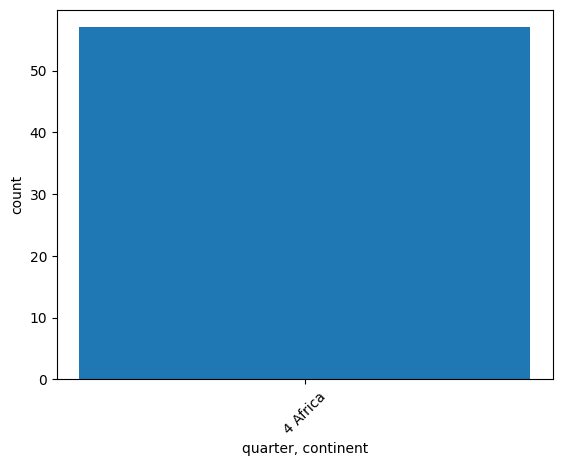

In [ ]:
_.bar()

In [ ]:
%%sql
SELECT p.product_name, l.continent, MIN(e.quantity), MAX(e.quantity), COUNT(p.product_name) AS number_of_orders, SUM(e.quantity) AS total_quantity_ordered 
FROM PRODUCT AS p, LOCATION AS l, DATEDIMENSION AS d, TRANSACTIONS AS t, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND t.key = e.transactions_key AND l.continent = 'Africa' AND d.quarter = '4'
Group by p.product_name, l.continent, e.quantity
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


product_name,continent,min,max,number_of_orders,total_quantity_ordered
Alarm Clock Bakelike Red,Africa,4,4,1,4
Assorted Bottle Top Magnets,Africa,12,12,1,12
Baking Set 9 Piece Retrospot,Africa,3,3,1,3
Belle Jardiniere Cushion Cover,Africa,4,4,1,4
Birdhouse Garden Marker,Africa,10,10,1,10
Card Holder Love Bird Small,Africa,6,6,1,6
Charlotte Bag Vintage Alphabet,Africa,10,10,1,10
Childrens Toy Cooking Utensil Set,Africa,6,6,1,6
Classic Glass Cookie Jar,Africa,6,6,1,6
4 Traditional Spinning Tops,Africa,12,12,1,12


<BarContainer object of 10 artists>

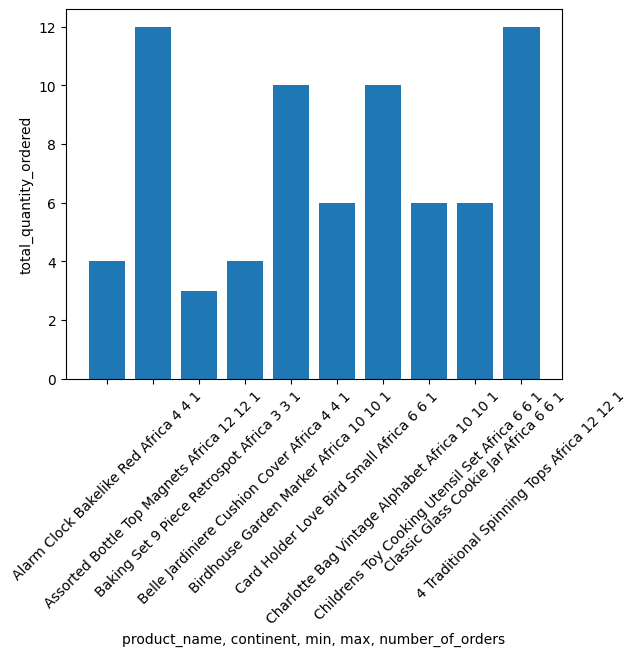

In [ ]:
_.bar()

##### Analysis
Similarly to the South American market, we only see sales to customers based in Africa during one quarter (quarter 4). This could possiibly be due to the following reasons: 
- Lack of data
- The company recently started making shipping available to that area of the world
- Missing data 
- This could also be simply because there were not any sales to consumers in Africa during the other quarters represented in this dataset

We recommend this be investigated further. If this is is simply because there were not any sales during quarter 1, 2 and 3, we recommend that the company attempt to increase sales in this region by increasing marketing efforts through initiatives such as paid social ads and influencer marketing in order to increase brand awareness in the region among individual users (Based on the data we have, most items are not being bought in bulk, which leads us to believe that this is being purchased by individual consumers vs. resellers). 

#### Most popular quarters to order and most popular items ordered per Quarter - Unknown Locations

In [ ]:
%%sql
SELECT DISTINCT(d.quarter), l.continent, COUNT(p.product_name)
FROM LOCATION AS l, DATEDIMENSION AS d, PRODUCT AS p, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND l.continent = 'Unknown' 
Group by l.continent, d.quarter
ORDER BY d.quarter LIMIT 30;

 * postgresql://student@/e-commerce8
3 rows affected.


quarter,continent,count
2,Unknown,83
3,Unknown,310
4,Unknown,54


<BarContainer object of 3 artists>

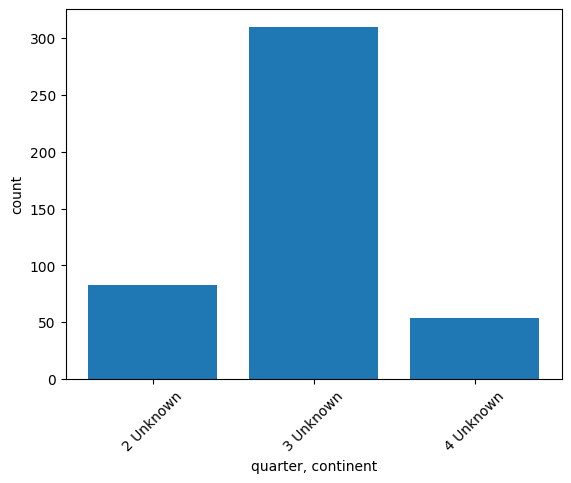

In [ ]:
_.bar()

In [ ]:
%%sql
SELECT p.product_name, l.continent, MIN(e.quantity), MAX(e.quantity), COUNT(t.transaction_no) AS number_of_orders, SUM(e.quantity) AS total_quantity_ordered
FROM PRODUCT AS p, LOCATION AS l, DATEDIMENSION AS d, TRANSACTIONS AS t, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND t.key = e.transactions_key AND l.continent = 'Unknown' AND d.quarter = '2'
Group by p.product_name, l.continent, e.quantity
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


product_name,continent,min,max,number_of_orders,total_quantity_ordered
4 Traditional Spinning Tops,Unknown,12,12,1,12
60 Teatime Fairy Cake Cases,Unknown,24,24,1,24
72 Sweetheart Fairy Cake Cases,Unknown,24,24,1,24
Area Patrolled Metal Sign,Unknown,12,12,1,12
Assorted Colour Bird Ornament,Unknown,16,16,1,16
Bag 125g Swirly Marbles,Unknown,12,12,1,12
Bag 250g Swirly Marbles,Unknown,12,12,1,12
Bag 500g Swirly Marbles,Unknown,12,12,1,12
Bingo Set,Unknown,8,8,1,8
3 Stripey Mice Feltcraft,Unknown,6,6,1,6


<BarContainer object of 10 artists>

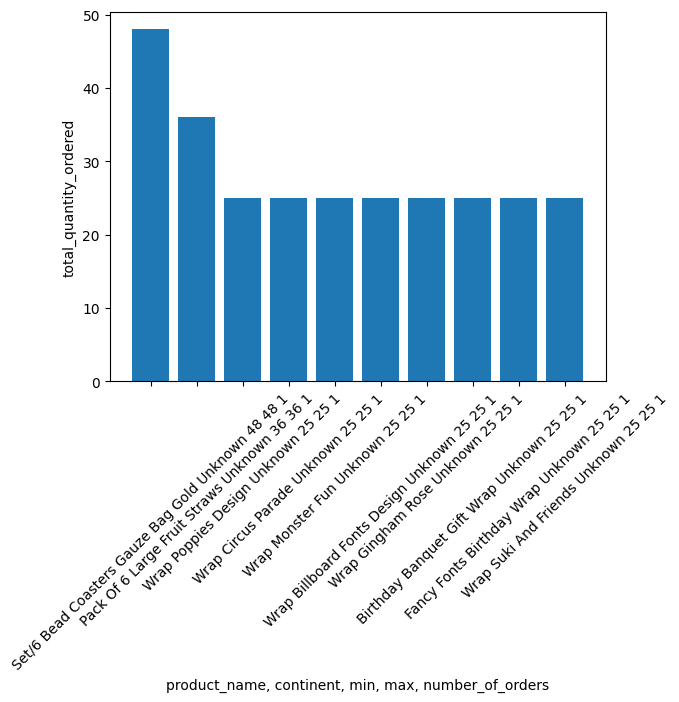

In [ ]:
_.bar()

In [ ]:
%%sql
SELECT p.product_name, l.continent, MIN(e.quantity), MAX(e.quantity), COUNT(t.transaction_no) AS number_of_orders, SUM(e.quantity) AS total_quantity_ordered
FROM PRODUCT AS p, LOCATION AS l, DATEDIMENSION AS d, TRANSACTIONS AS t, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND t.key = e.transactions_key AND l.continent = 'Unknown' AND d.quarter = '3'
Group by p.product_name, l.continent, e.quantity
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


product_name,continent,min,max,number_of_orders,total_quantity_ordered
Cosy Hour Cigar Box Matches,Unknown,1,1,3,3
Hand Warmer Babushka Design,Unknown,1,1,2,2
3 Stripey Mice Feltcraft,Unknown,1,1,2,2
Boom Box Speaker Girls,Unknown,1,1,2,2
Egg Frying Pan Blue,Unknown,1,1,2,2
Fairy Cake Flannel Assorted Colour,Unknown,1,1,2,2
Assorted Colour Bird Ornament,Unknown,3,3,2,6
3d Sheet Of Dog Stickers,Unknown,1,1,2,2
Edwardian Parasol Red,Unknown,1,1,2,2
Hanging Metal Chicken Decoration,Unknown,2,2,2,4


<BarContainer object of 10 artists>

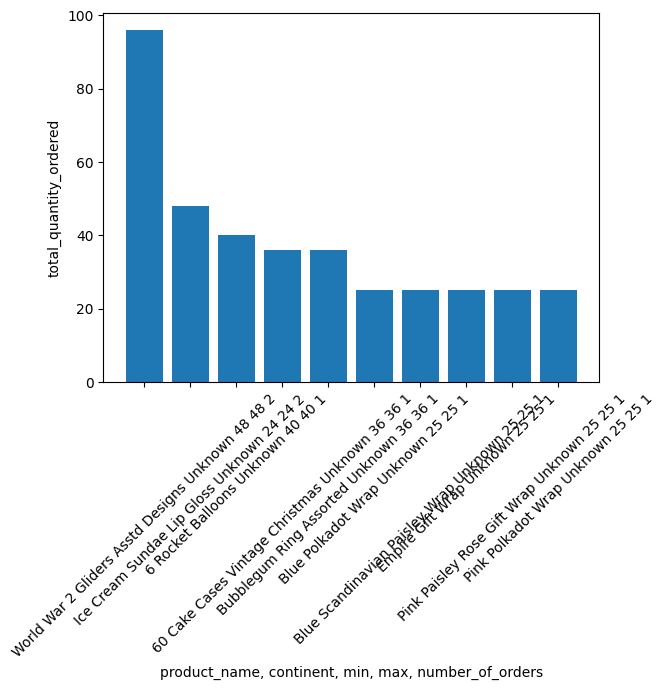

In [ ]:
_.bar()

In [ ]:
%%sql
SELECT p.product_name, l.continent, MIN(e.quantity), MAX(e.quantity), COUNT(t.transaction_no) AS number_of_orders, SUM(e.quantity) AS total_quantity_ordered
FROM PRODUCT AS p, LOCATION AS l, DATEDIMENSION AS d, TRANSACTIONS AS t, E_COMMERCE AS e
WHERE 
 d.key = e.datedimension_key AND l.key = e.location_key AND p.key = e.product_key AND t.key = e.transactions_key AND l.continent = 'Unknown' AND d.quarter = '4'
Group by p.product_name, l.continent, e.quantity
ORDER BY COUNT(p.product_name) DESC LIMIT 10;

 * postgresql://student@/e-commerce8
10 rows affected.


product_name,continent,min,max,number_of_orders,total_quantity_ordered
Airline Lounge Metal Sign,Unknown,1,1,1,1
Bingo Set,Unknown,1,1,1,1
Birthday Party Cordon Barrier Tape,Unknown,2,2,1,2
Blue Giant Garden Thermometer,Unknown,1,1,1,1
Camouflage Led Torch,Unknown,12,12,1,12
Cat Bowl Vintage Cream,Unknown,1,1,1,1
Chest Of Drawers Gingham Heart,Unknown,1,1,1,1
Christmas Lights 10 Vintage Baubles,Unknown,1,1,1,1
Cream Hanging Heart T-Light Holder,Unknown,2,2,1,2
72 Sweetheart Fairy Cake Cases,Unknown,1,1,1,1


<BarContainer object of 10 artists>

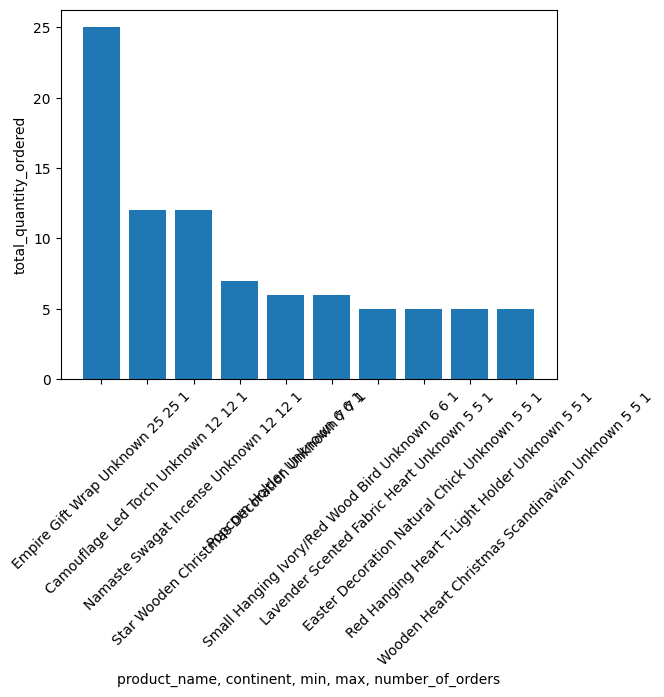

In [ ]:
_.bar()

##### Analysis 
Based on the data, we see that the data with the highest number of orders with unknown locations is quarter 3, while quarter 2 and quarter 4's numbers have a reasonably small difference between the two. No data is available for quarter 1. We believe that more investigation is necessary, and that the company should take measures to ensure that future orders all have known countries/locations. In terms of the orders, we see a variation in the type of products ordered. However, the biggest trend with this data is that there are no bulk orders, and the majority of transactions only have one quantity of an item attached to it. 

#### Conclusion 
Based on the data, we see that there are more consumers purchasing these products for individual use in the European markets, while there are more customers who are resellers in other markets outside of Europe (Asia and Oceania, especially). However, the resellers in Europe tend to purchase larger quantities of items, possibly due to reduced shipping costs. Knowing this, we recommend that the company create more reseller-friendly initiatives for consumers in this market, such as special discounts for resellers or decreased shipping costs. For consumers in Europe, the company should adopt a marketing strategy that targets individual consumers. This can be done through several methods, such as paid ads on social media platforms, or hiring influencers to advertise the brand and increase brand awareness. 


We also see that different markets and regions have different quarters where sales increase. For example, North America and Europe both have the lowest sales in quarter 1 and the highest sales in quarter 4, while Asia has the highest sales during quarter 2 and the lowest sales during quarter 4. During the quarters with lower sales, the company should offer region-specific discounts in order to increase sales for that period. 


Furthermore, see that brand awareness is low in South American and African markets. We recommend combatting this by utilizing google ads to optimize search engine results, and optimizing keyword search methods. We also recommend launching social media campaigns targeting consumers in these regions in order to increase brand awareness. 


Finally, we see that the European market dominates the consumer base for this company. This could be for a number of reasons, but we recommend decreasing the overall shipping cost for consumers outside of Europe in order to incentivise them to purchase products from the brand. 